In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import torch

from ast import literal_eval
from matplotlib import gridspec

from os.path import join, exists
import os


In [56]:
# prefix_path = '/Data2/home/kysim/Quantization/0602/MY_LOGS'
# prefix_csv_path = join(prefix_path, 'theatas.csv')

class ThetaLoader:
    def __init__(self, architecture_name, search_space_depth=17):
        self.prefix_path = join('./searched_result', architecture_name, 'supernet_function_logs')
        self.search_space_depth=search_space_depth
        
        # for prior version - theatas.csv
        self.prefix_csv_path = join(self.prefix_path, 'theatas.csv')
        
        if not os.path.exists(self.prefix_csv_path):
            # for new version - theta.csv
            self.prefix_csv_path = join(self.prefix_path, 'thetas.csv')
            
        self.prefix_image_path = join(self.prefix_path, 'graph_iamge')
        
        if not exists(self.prefix_image_path):
            os.makedirs(self.prefix_image_path)
        

    # get theata and temperature list from csv
    def read_csv(self):
        thetas_csv = pd.read_csv(self.prefix_csv_path)
        
        self.thetas_list = []
        self.temperature_list = thetas_csv['1'].tolist()
        self.epoch_num = len(thetas_csv)
        
        for i in range(self.epoch_num): # 180
    
            # print(thetas_csv['0'].iloc[i])
            temp_theta = literal_eval(thetas_csv['0'].iloc[i])

            self.thetas_list.append(temp_theta)
        
    def get_softmax_result(self):
        softmax_thetas_list = []
        
        # (epoch, 22, 9)
        for i in range(self.epoch_num): # 180
            # print(thetas_csv['0'].iloc[i])
            temp_theta = self.thetas_list[i]

            temperature = self.temperature_list[i]

            temp_softmax_list=[]
            
            for j in range(self.search_space_depth):
                temp_softmax_list.append(torch.nn.functional.softmax(torch.tensor(temp_theta[j])).tolist())
            softmax_thetas_list.append(temp_softmax_list)
            
        return softmax_thetas_list
        
    def get_gumbel_softmax_result(self, seed=1):
        #if you want gumbel softmax and static result, you can set like that.
        manual_seed = seed
        np.random.seed(manual_seed)
        torch.manual_seed(manual_seed)
        torch.cuda.manual_seed_all(manual_seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        
        gumbel_thetas_list = []

        # (epoch, 22, 9)
        for i in range(self.epoch_num): # 180
            # print(thetas_csv['0'].iloc[i])
            temp_theta = self.thetas_list[i]

            temperature = self.temperature_list[i]

            temp_gumbel_list=[]

        
            for j in range(self.search_space_depth):
                temp_gumbel_list.append(torch.nn.functional.gumbel_softmax(torch.tensor(temp_theta[j]), temperature).tolist())
            gumbel_thetas_list.append(temp_gumbel_list)

        return gumbel_thetas_list

    
    def plot_architecture_search_trend(self, softmax_thetas_list):
        sample_architecture = np.argmax(softmax_thetas_list,axis=2)
        plt.plot(sample_architecture)
        plt.savefig(join(self.prefix_image_path, 'search_space.jpg'))

        
    def plot_thetas_on_epoch(self, epoch, save=False):
        plt.plot(self.thetas_list[epoch])
        
        if save == True:
            plt.savefig(join(self.prefix_image_path, f"thetas_epoch_{epoch}.jpg"))
        
        





/home/kysim/anaconda3/envs/py37_tf1/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


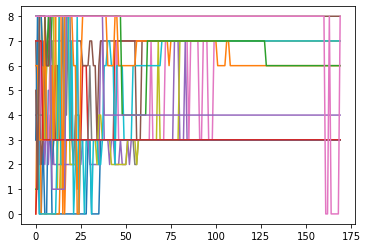

In [54]:
# loader set up
# arch_theta_loader = theta_loader('0817_test_eval_min01_cifar100')

# loader read csv
# arch_theta_loader.read_csv()

# loader read csv
# softmax_result = arch_theta_loader.get_softmax_result()

# print(softmax_result)
# ploting
# arch_theta_loader.plot_architecture_search_trend(softmax_result)

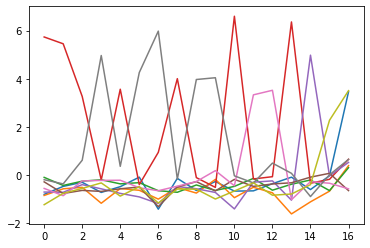

In [55]:
# arch_theta_loader.plot_thetas_on_epoch(-1)

In [142]:
# softmax_thetas_list[130]
# gumbel_thetas_list[130]

In [143]:
# soft_mask_variables = torch.nn.functional.gumbel_softmax(theta_list, temperature)
# output  = sum(m * op(x) for m, op in zip(soft_mask_variables, self.ops))

## check architecture for steps

In [148]:
sampled_index = [4, 29, 59, 84, 114, 139, 169]
candidate_blocks = ['ir_k3_e1', 'ir_k3_s2', 'ir_k3_e3', 'ir_k3_e6', 'ir_k5_e1', 'ir_k5_s2', 'ir_k5_e3', 'ir_k5_e6', 'skip']


for idx in sampled_index:
    arch = np.array(softmax_thetas_list)[idx,:,:]
    print(idx)
    
    temp = []
    
    for i in np.take(candidate_blocks, np.argmax(arch, axis=-1)):
        temp.append([i])
        
        
    print(temp)


4
[['ir_k3_e6'], ['ir_k3_e1'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k5_e1'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k5_e1'], ['ir_k5_e3'], ['ir_k3_e1'], ['ir_k5_e3'], ['ir_k3_e6'], ['skip'], ['ir_k3_e6'], ['skip'], ['skip'], ['skip']]
29
[['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k5_e3'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['skip'], ['skip'], ['ir_k3_e6'], ['skip'], ['skip'], ['skip']]
59
[['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k5_e3'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k5_e1'], ['ir_k3_e6'], ['ir_k5_e1'], ['skip'], ['skip']]
84
[['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k5_e6'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k5_e6'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k5_e6'], ['ir_k3_e6'], ['ir_k5_e1'], ['skip'], ['skip']]
114
[['ir_k3_e6'], ['ir_k3_e6'], ['ir_k3_e6'], ['ir_k5_e6'], ['ir_k3_e6'], ['ir_k5_e6

In [100]:
print(np.take(candidate_blocks, np.argmax(arch, axis=-1)))

['ir_k3_e6' 'ir_k3_e6' 'ir_k5_e6' 'ir_k5_e6' 'ir_k3_e3' 'ir_k5_e6'
 'ir_k5_e6' 'ir_k3_e6' 'ir_k3_e3' 'ir_k3_e3' 'ir_k3_e6' 'ir_k5_e1' 'skip'
 'ir_k3_e6' 'skip' 'skip' 'skip']


## Plotting architecture

/Data2/home/kysim/anaconda3/envs/py37_tf1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Data2/home/kysim/anaconda3/envs/py37_tf1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Data2/home/kysim/anaconda3/envs/py37_tf1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum +

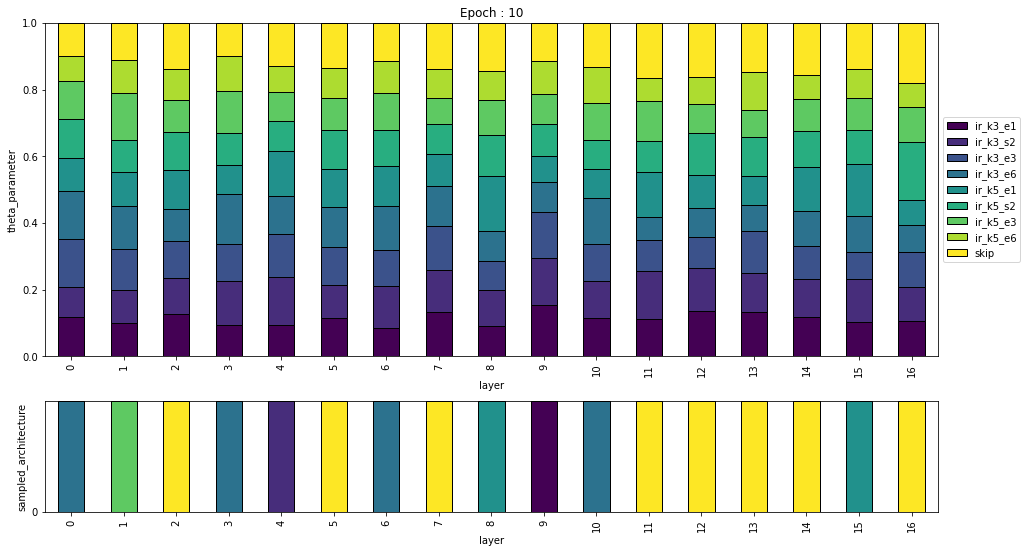

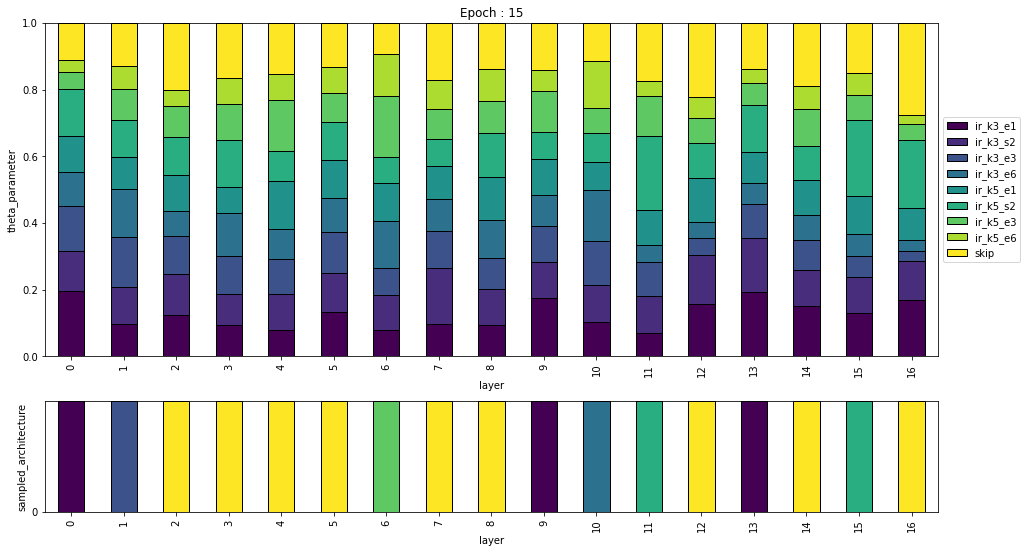

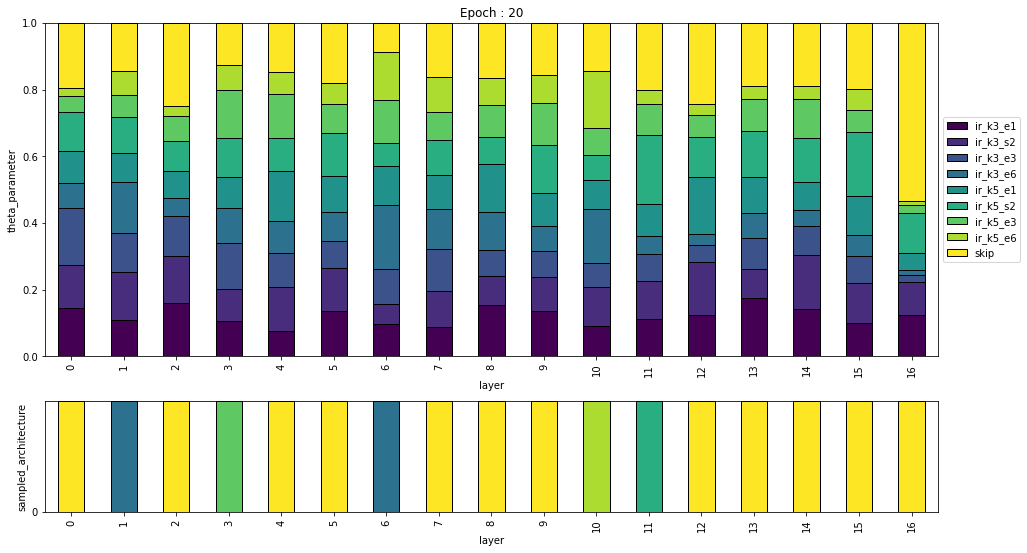

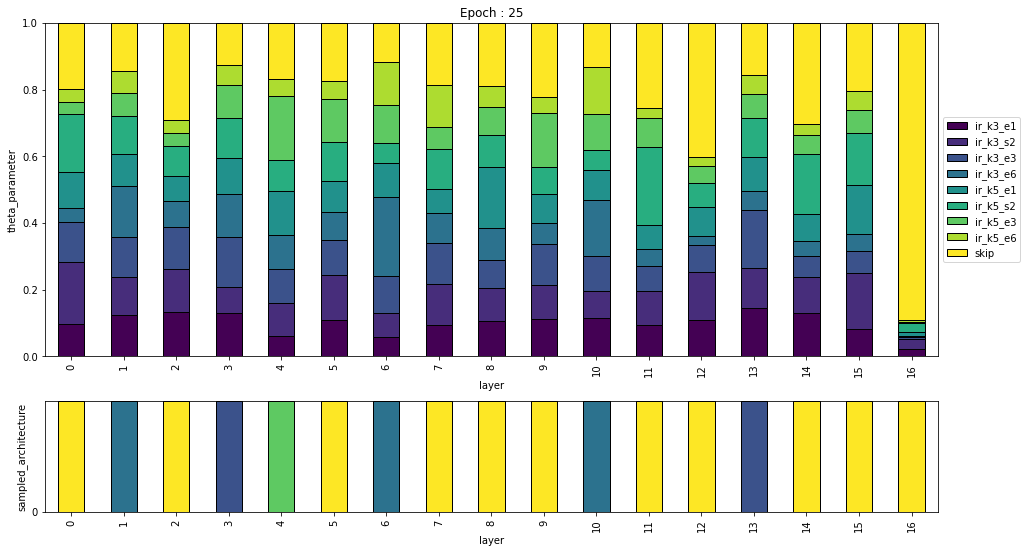

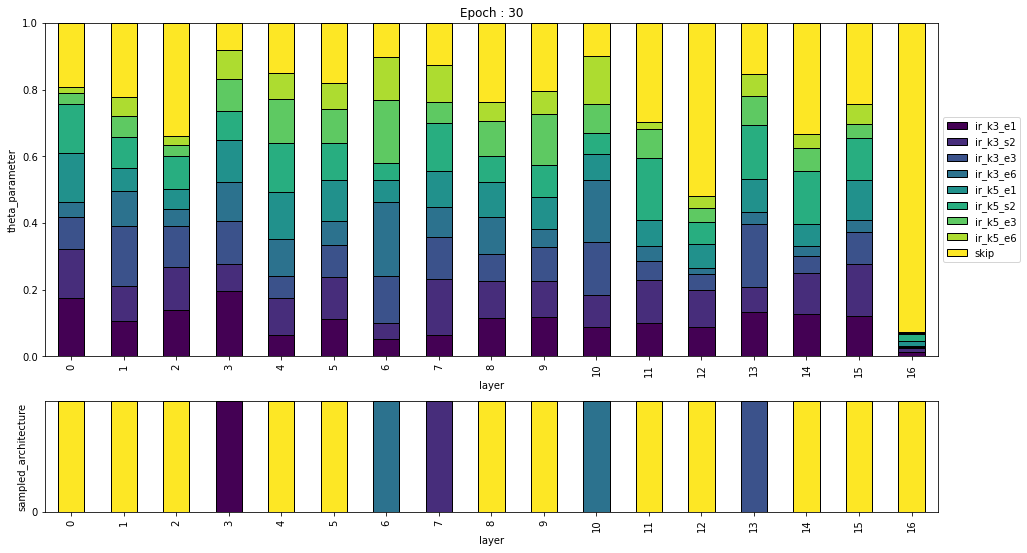

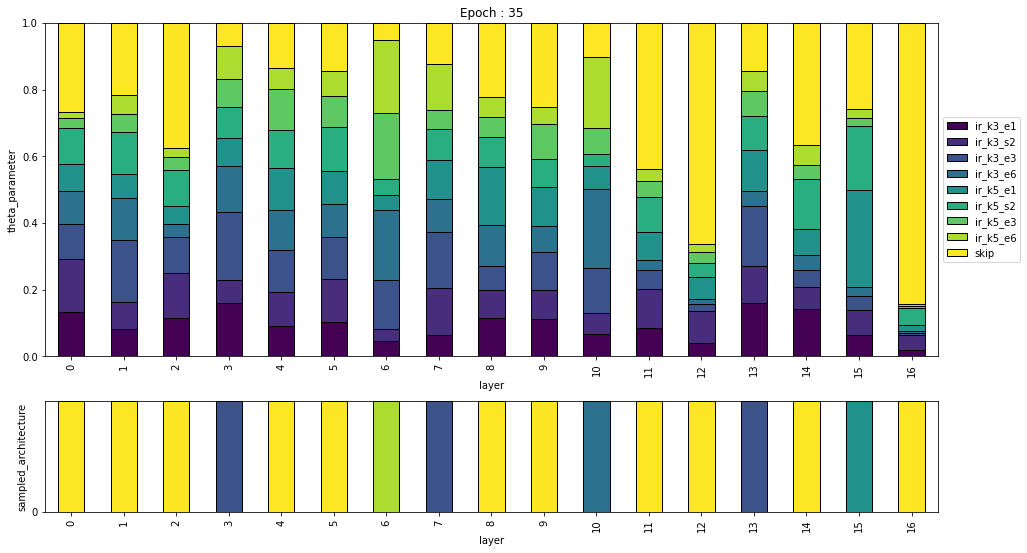

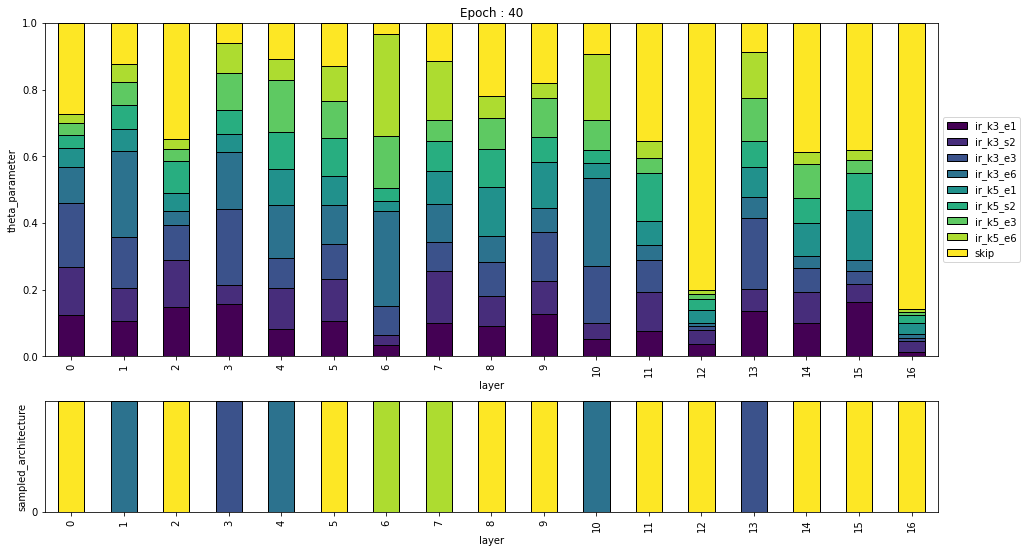

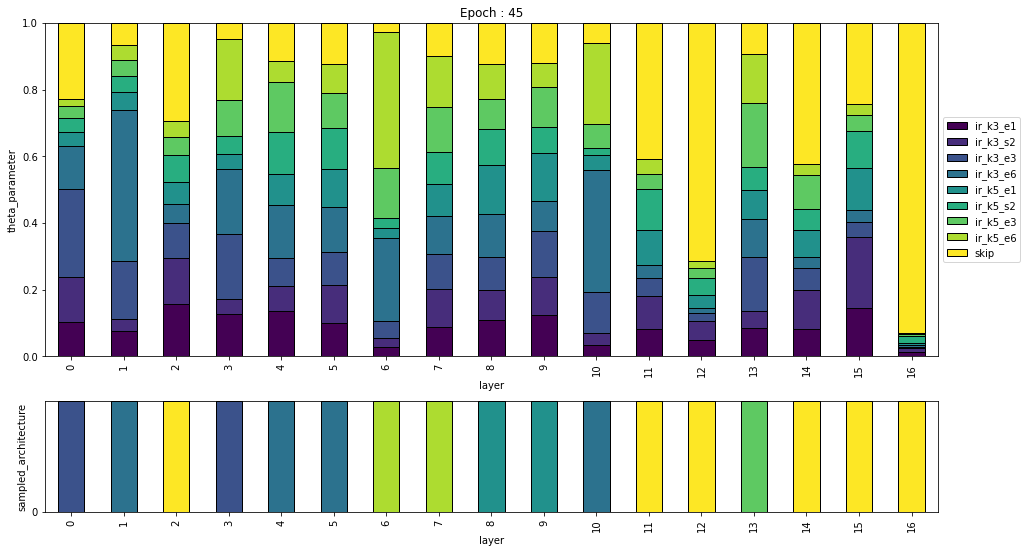

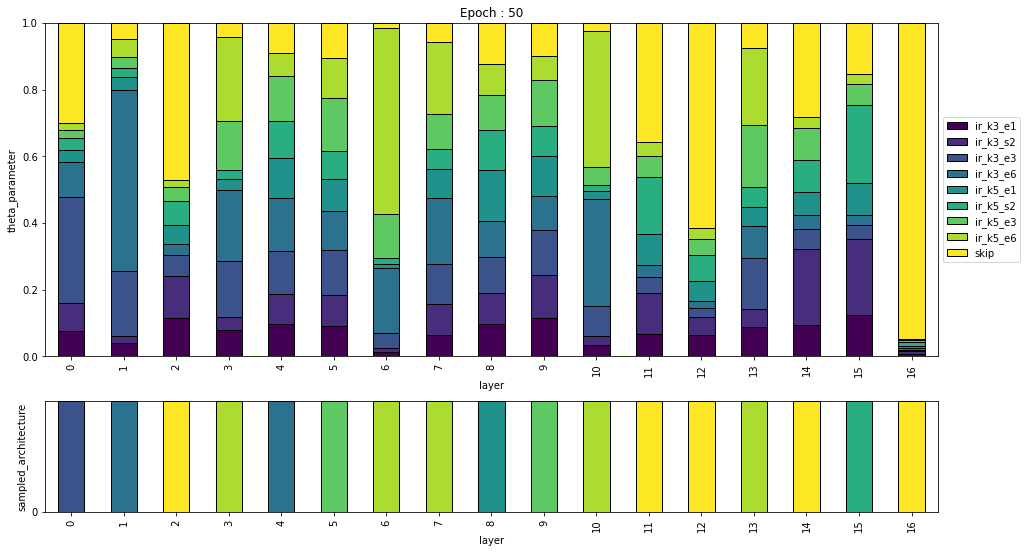

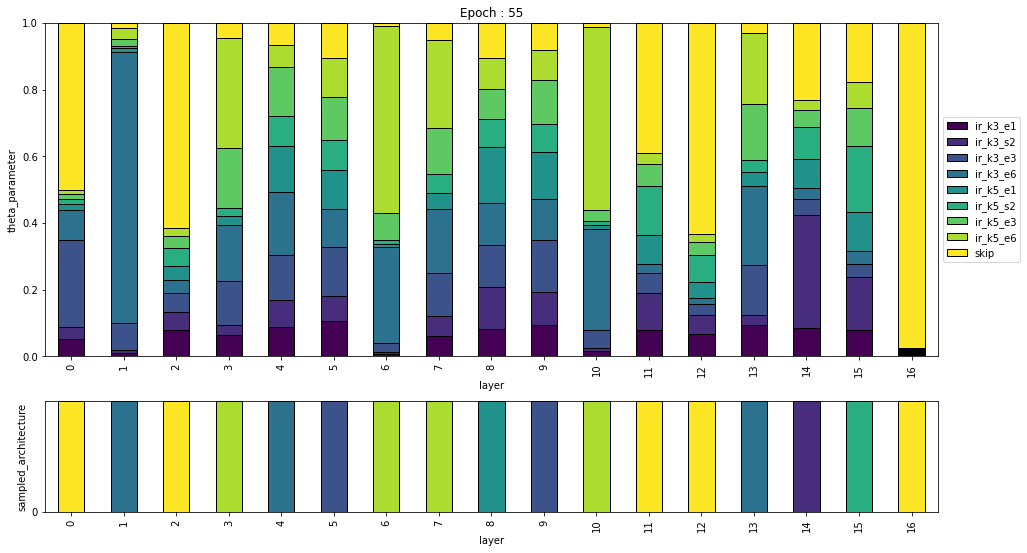

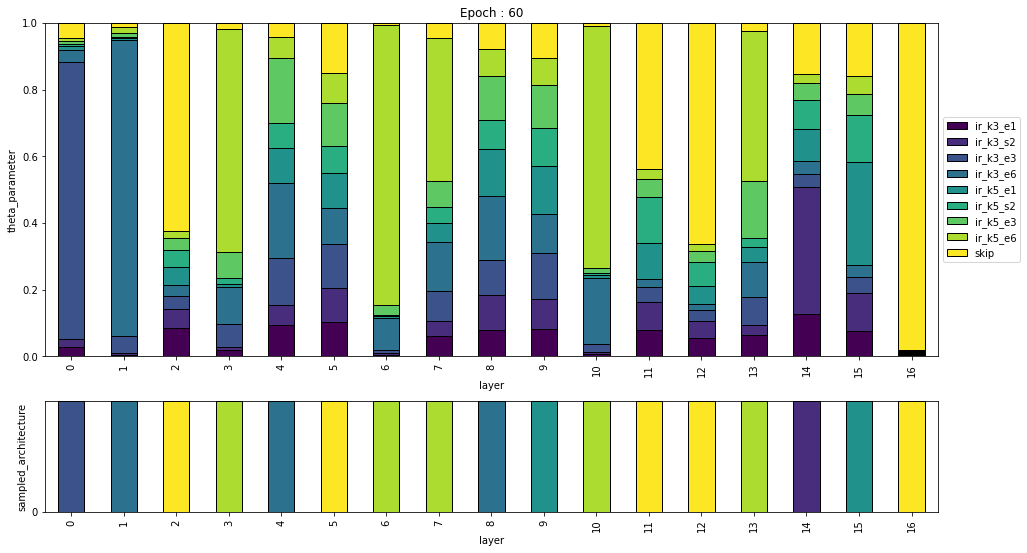

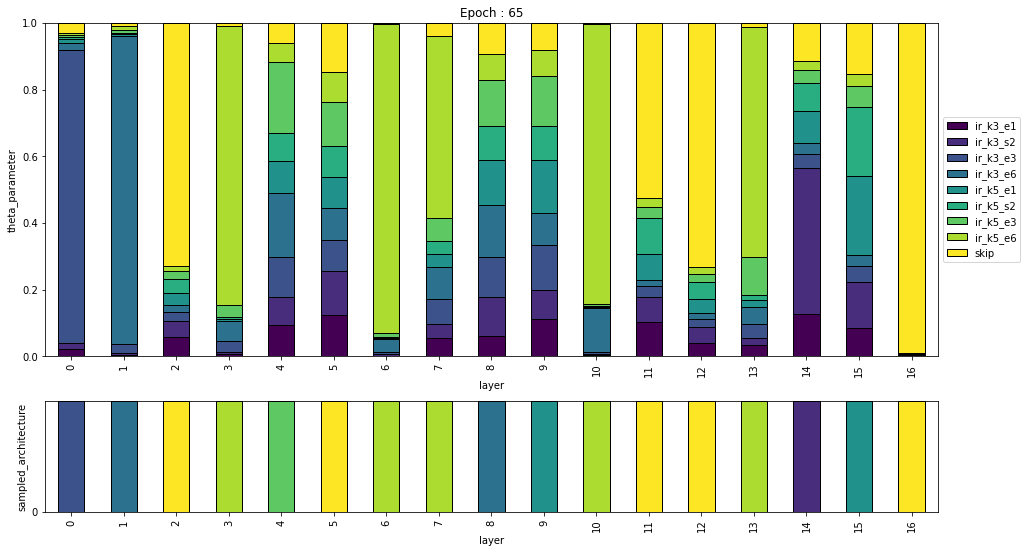

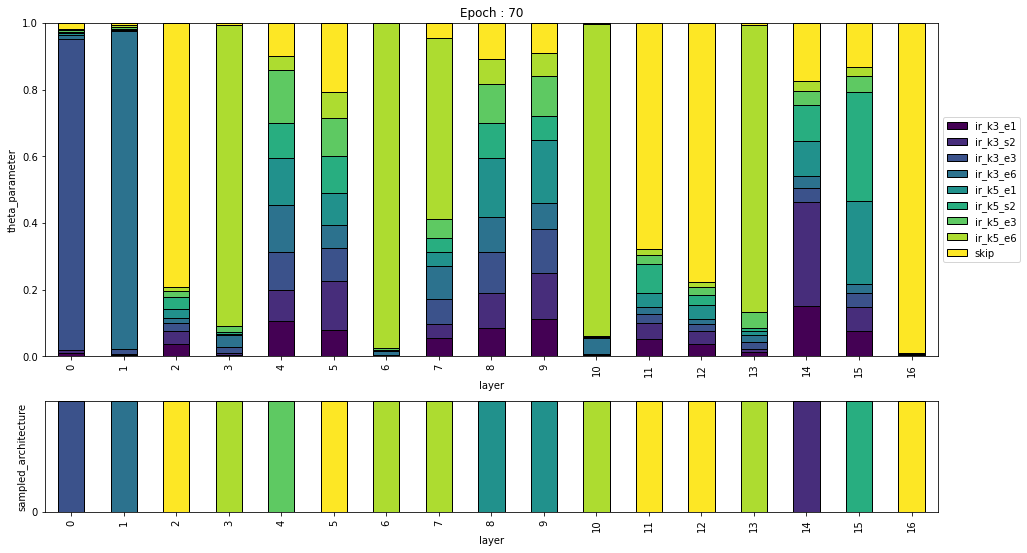

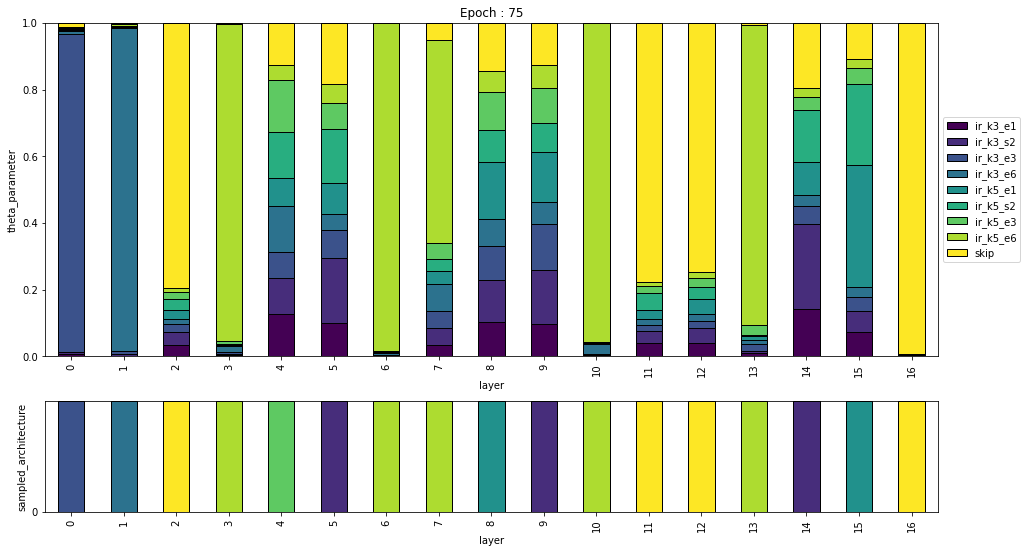

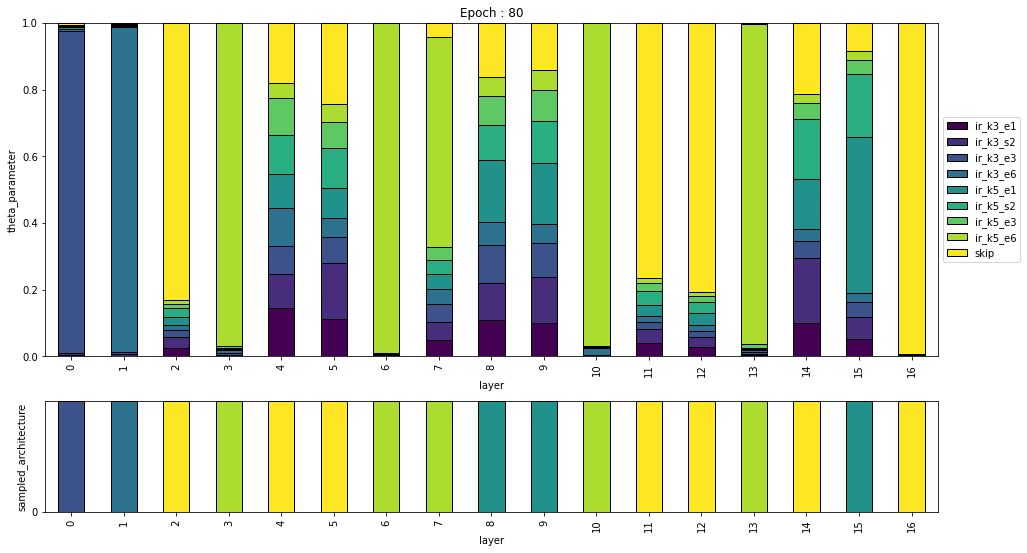

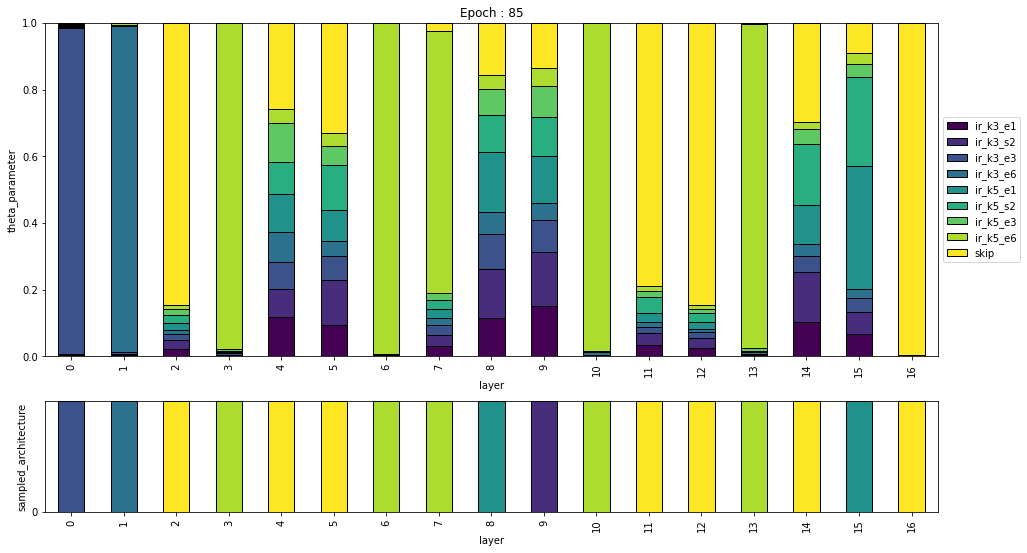

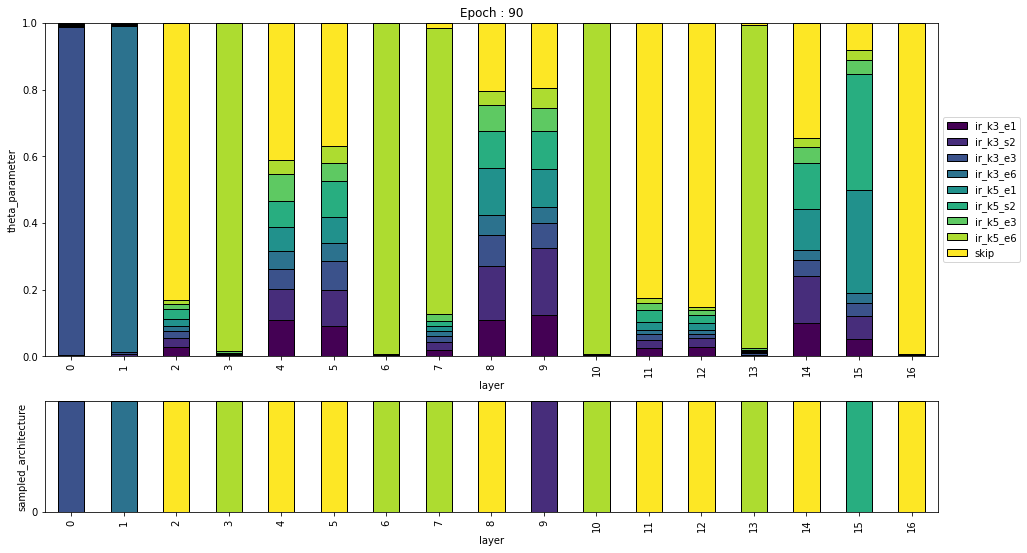

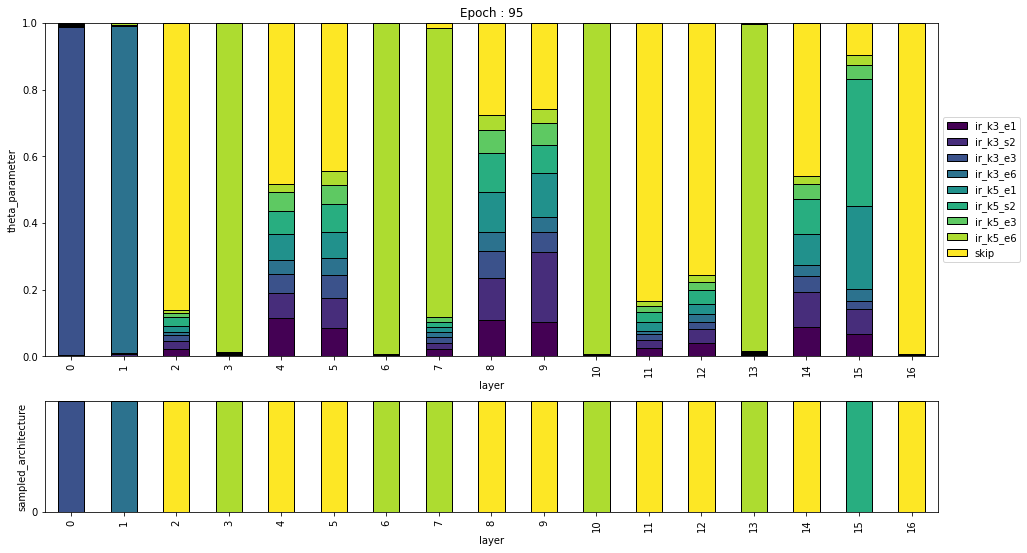

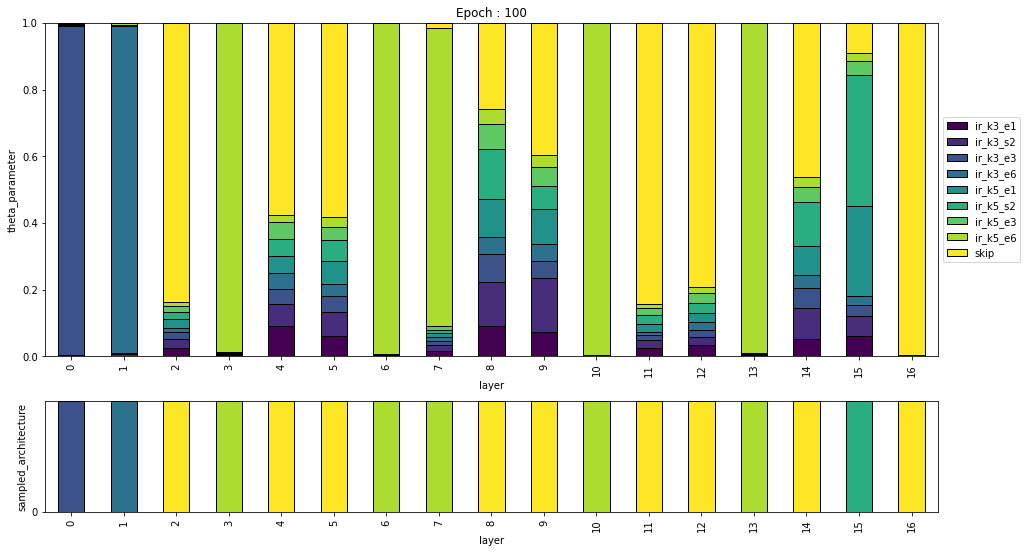

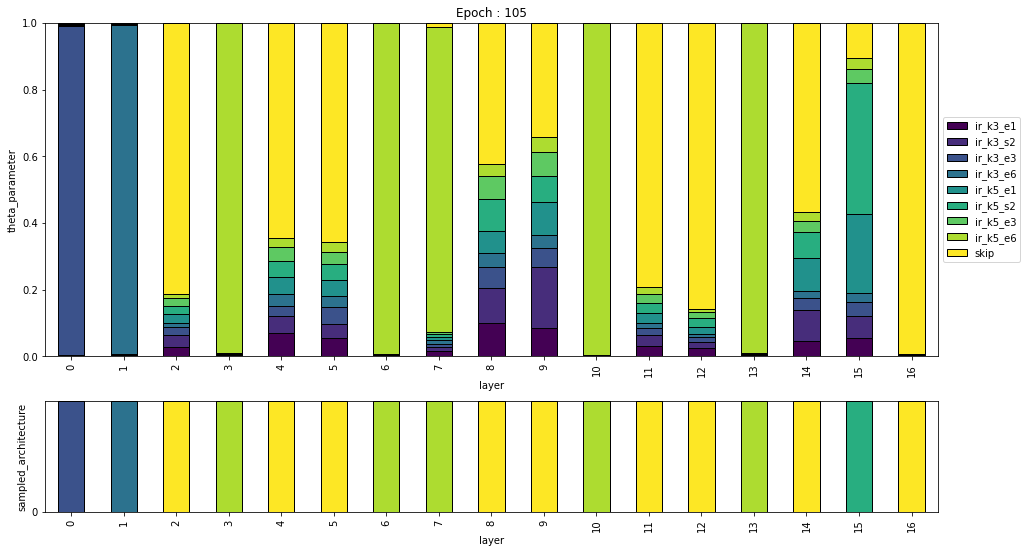

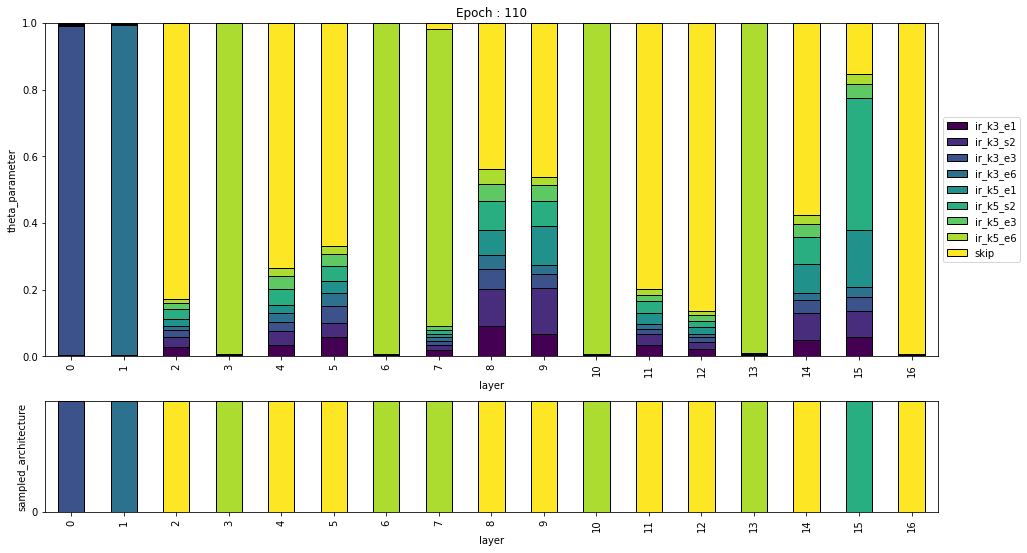

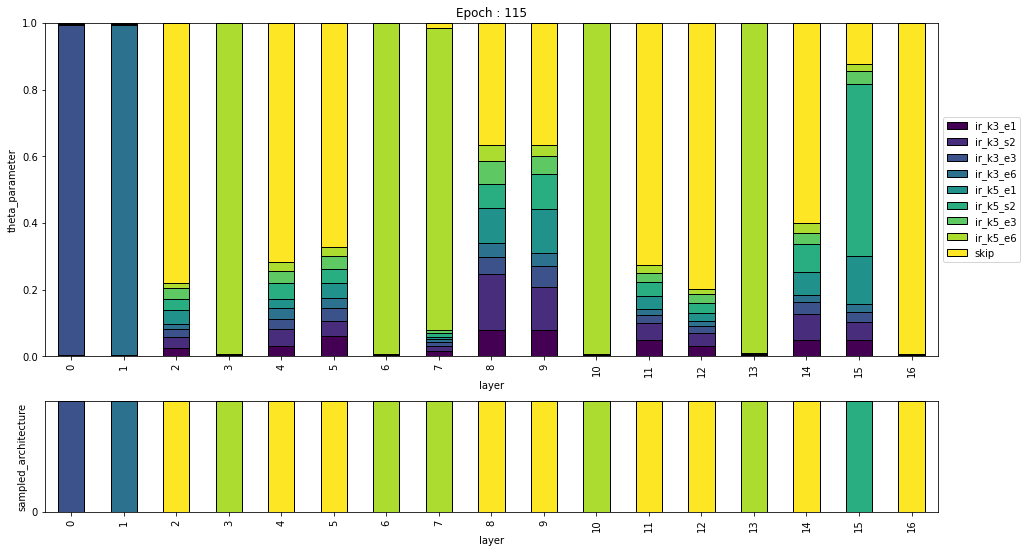

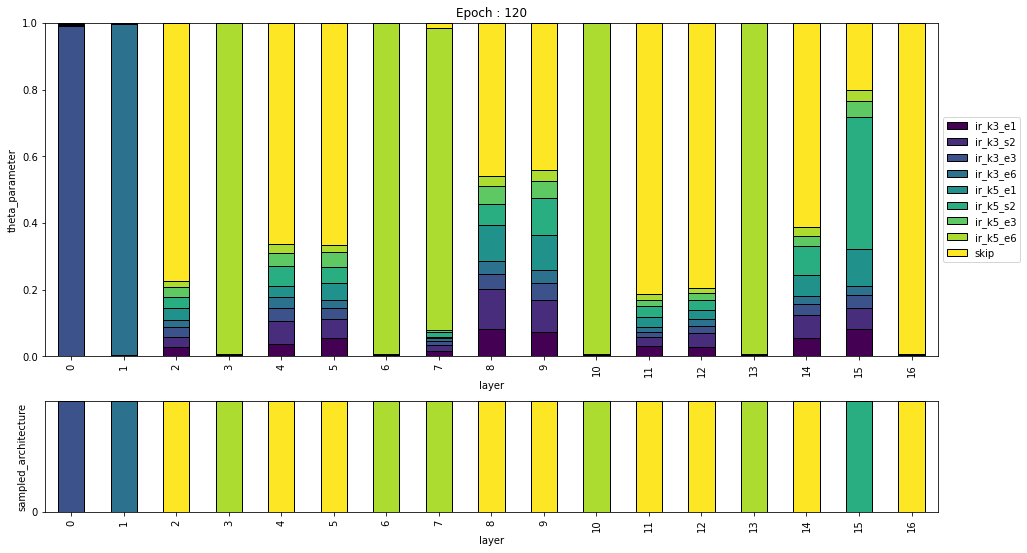

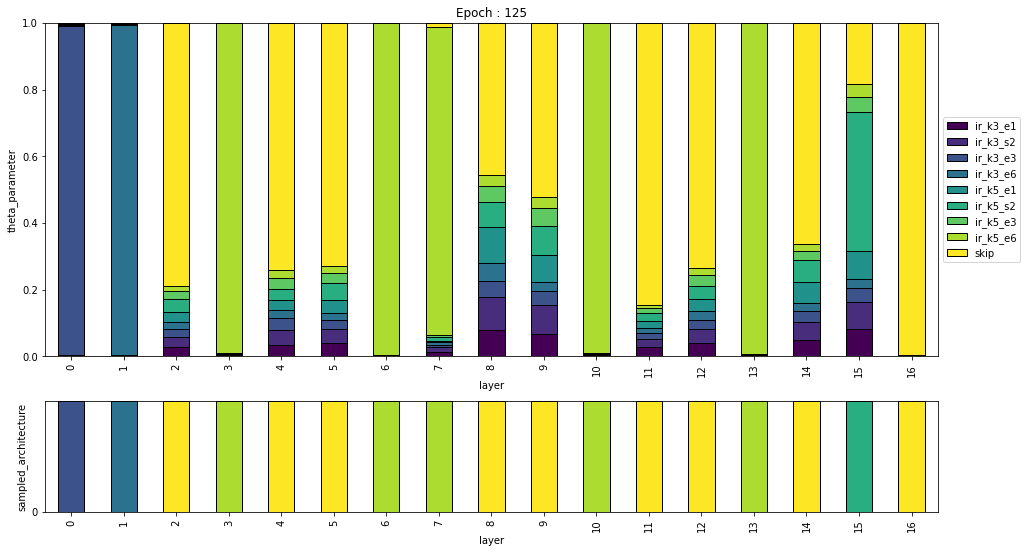

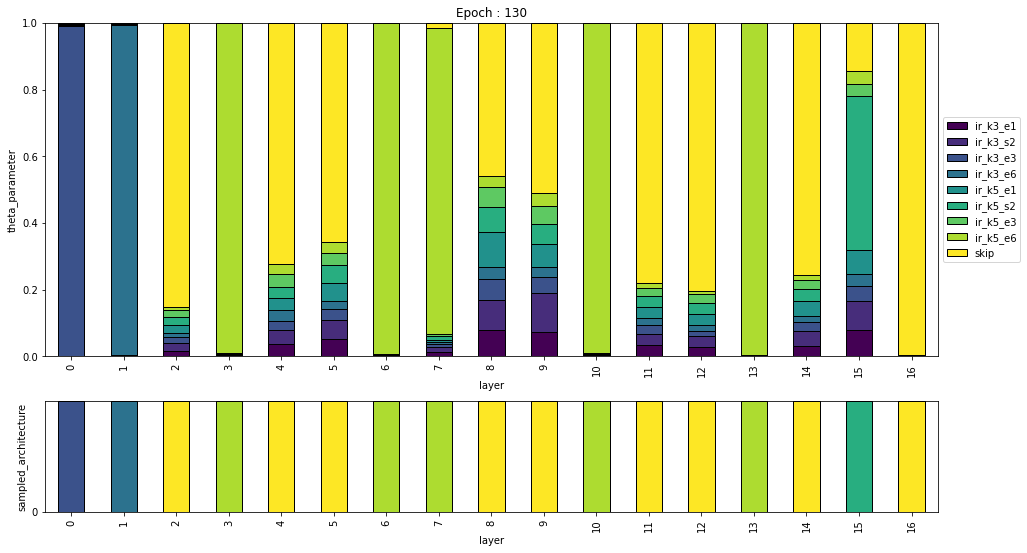

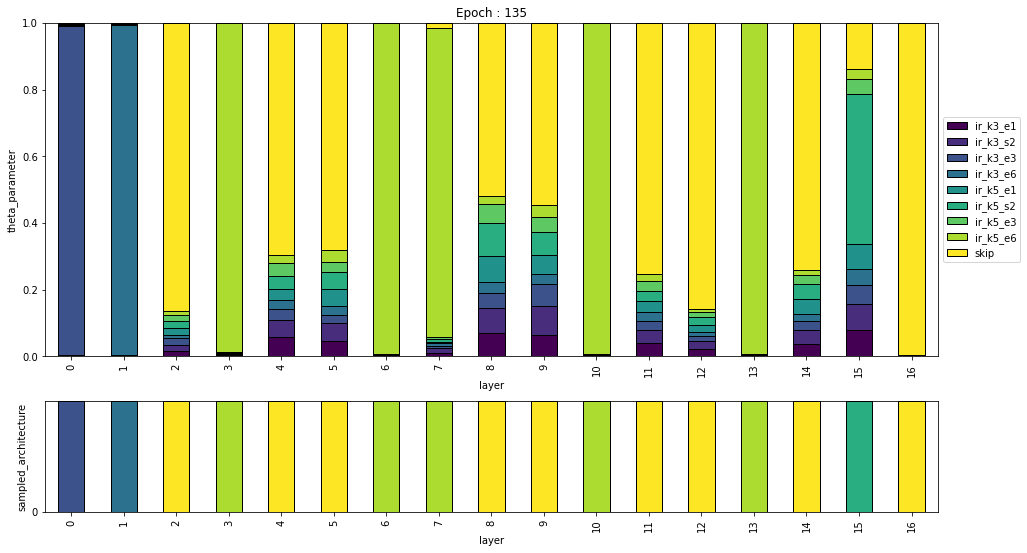

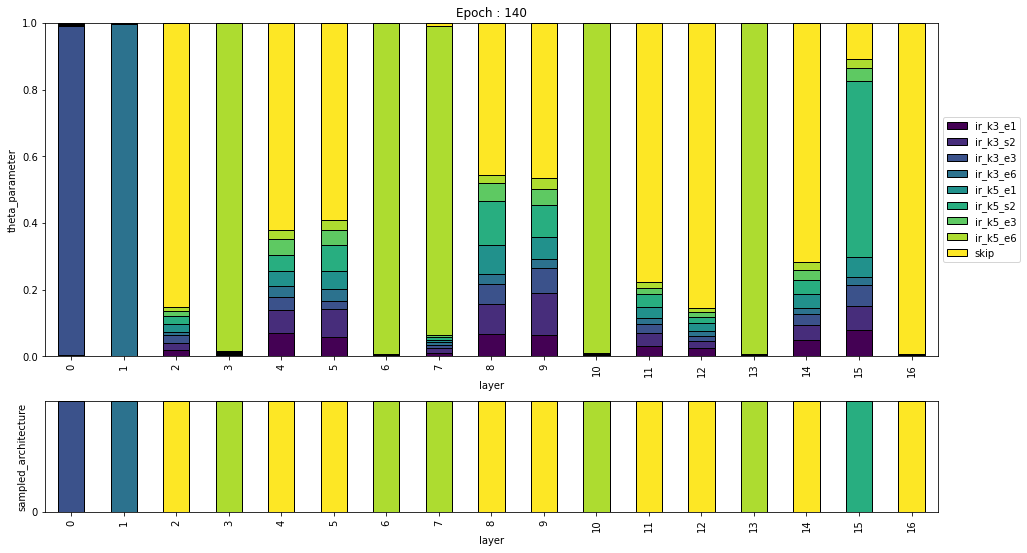

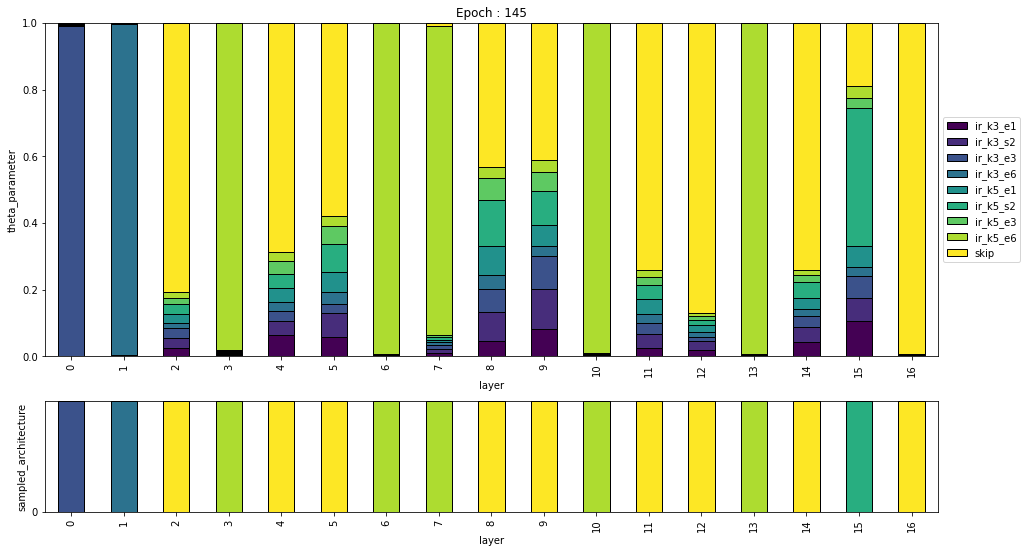

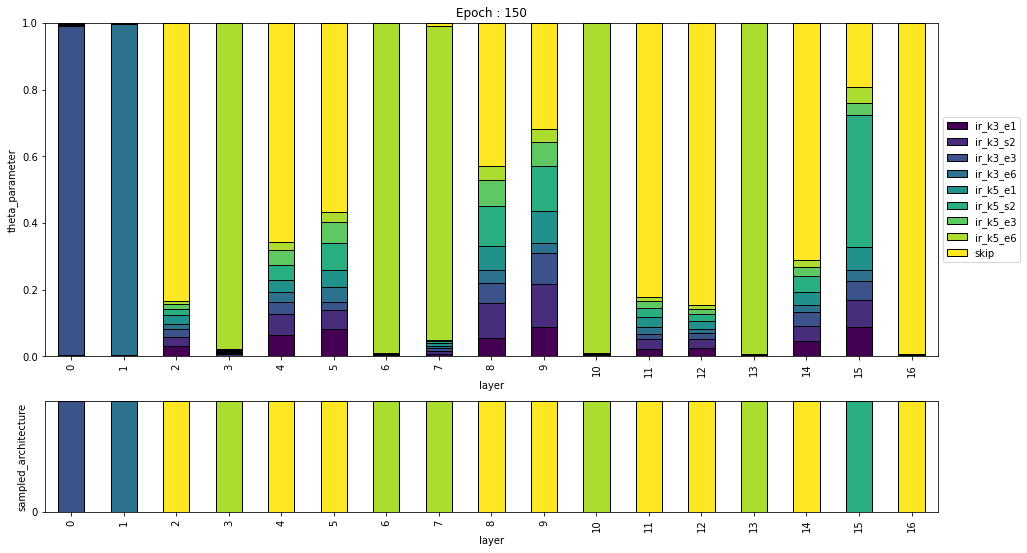

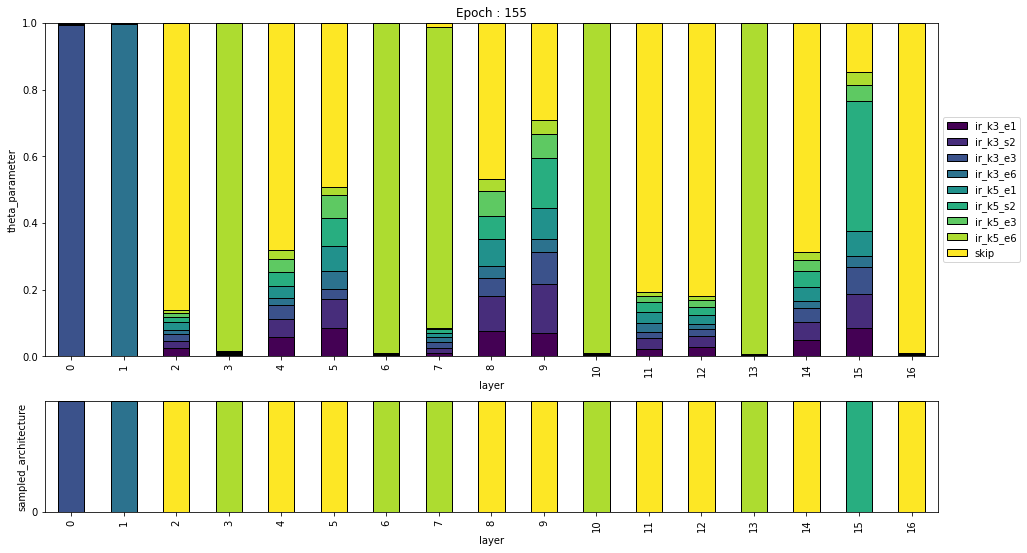

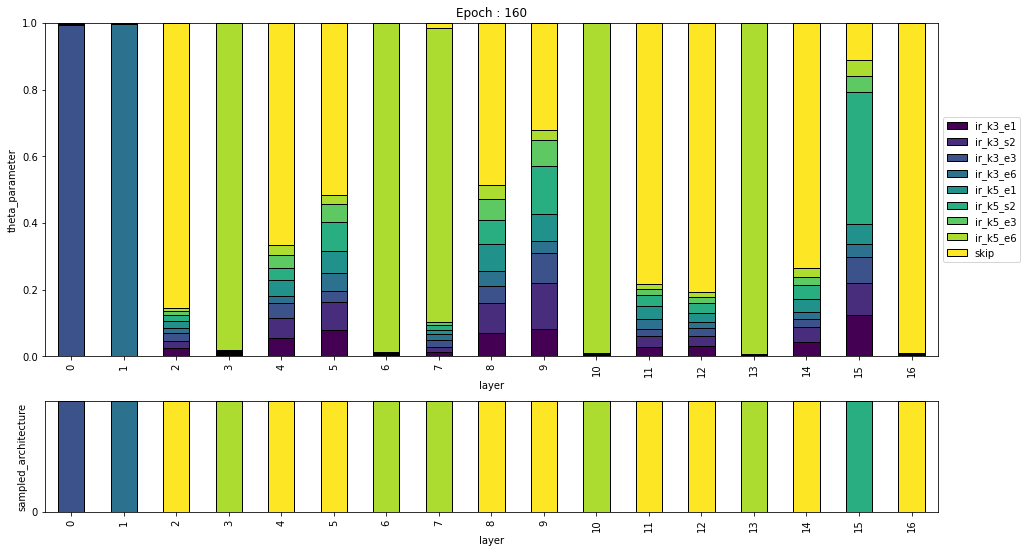

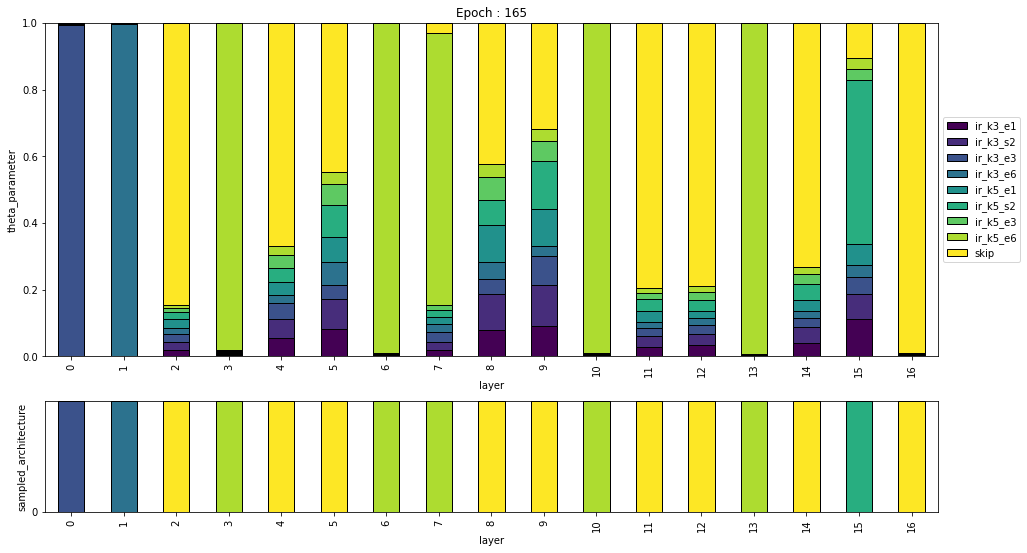

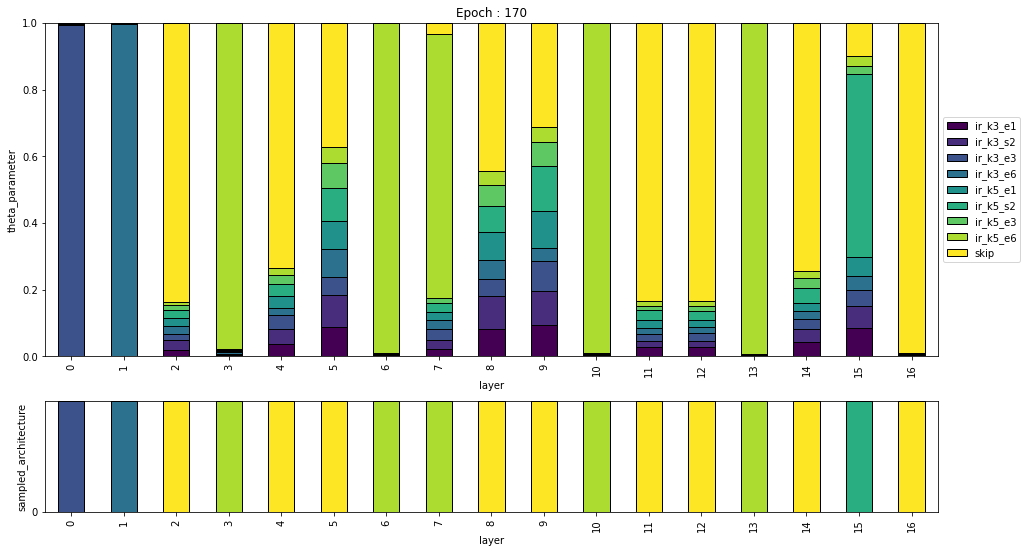

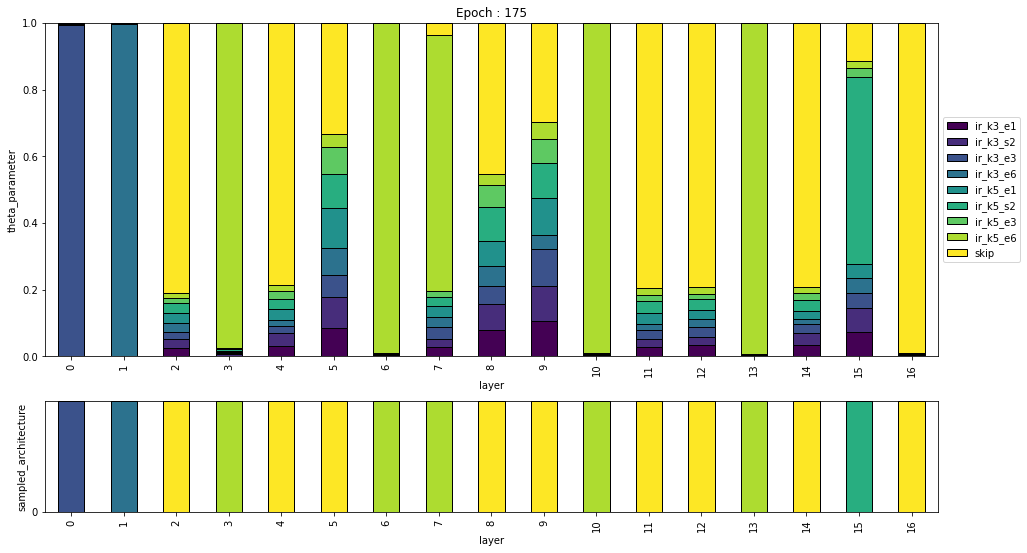

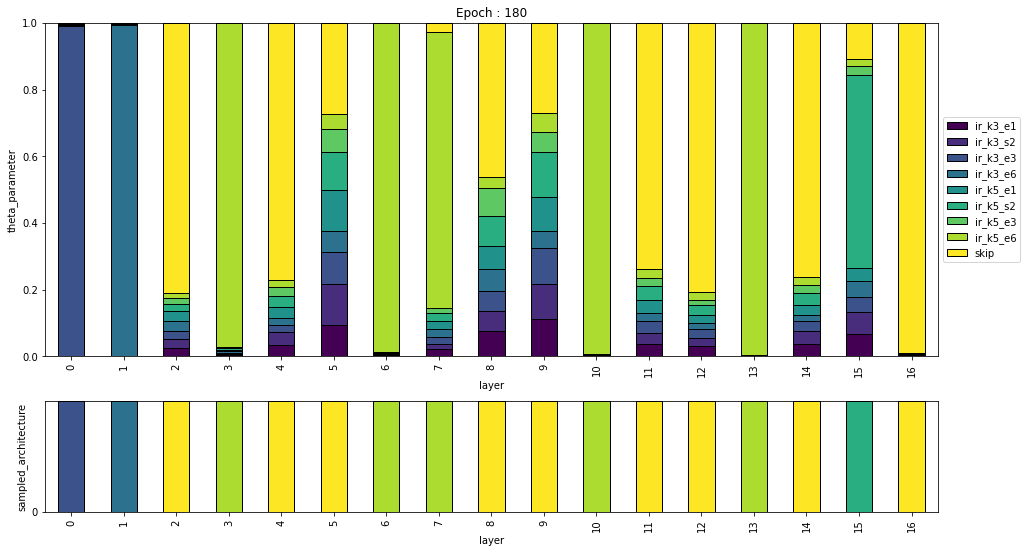

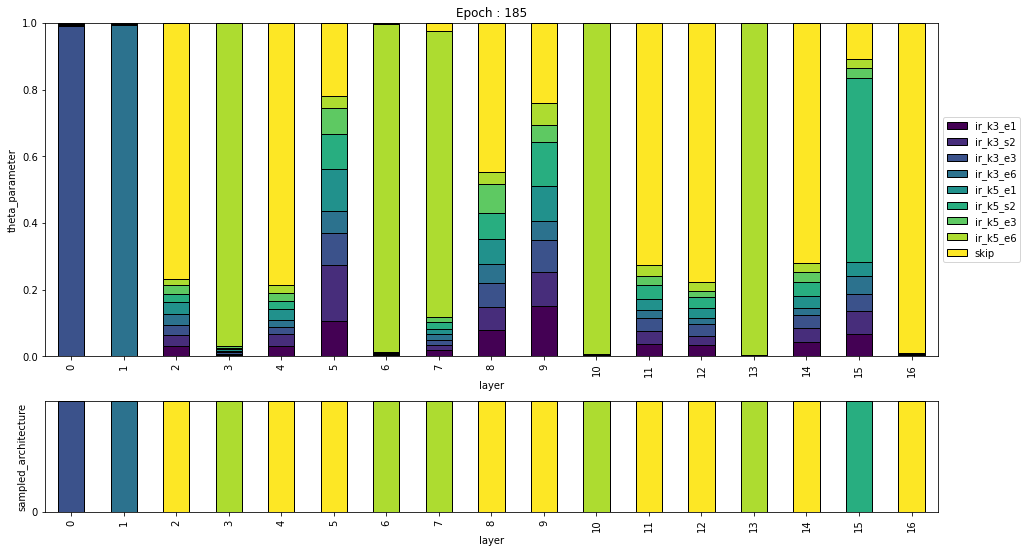

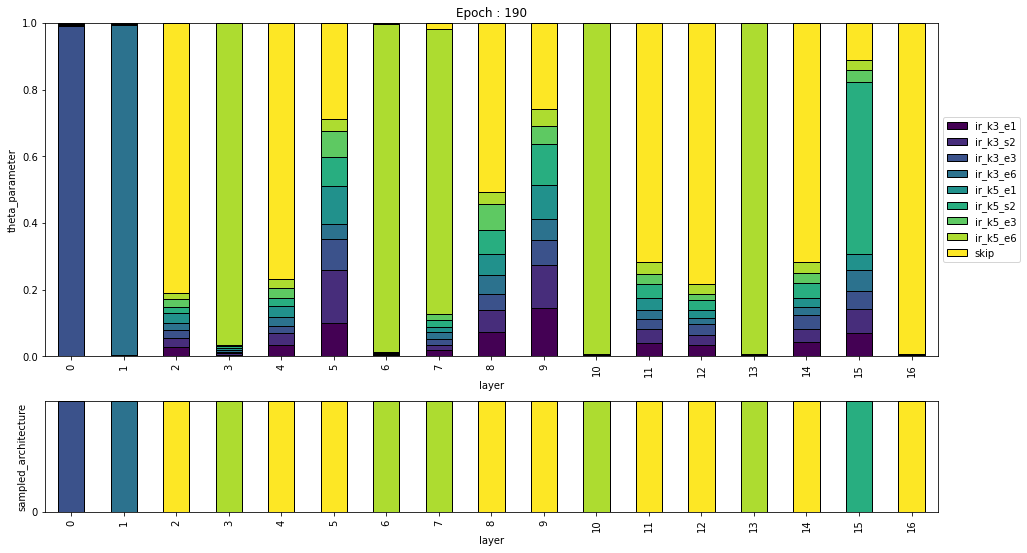

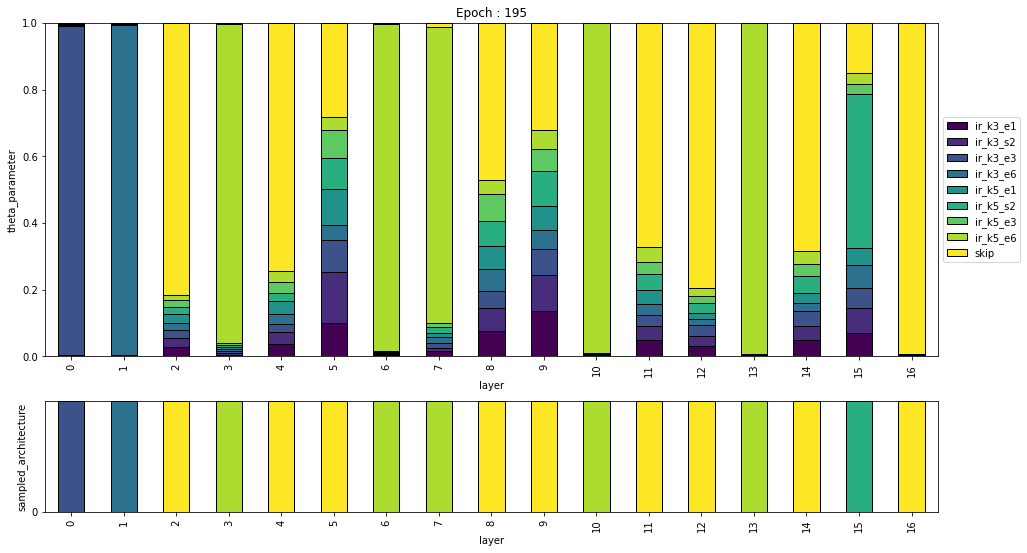

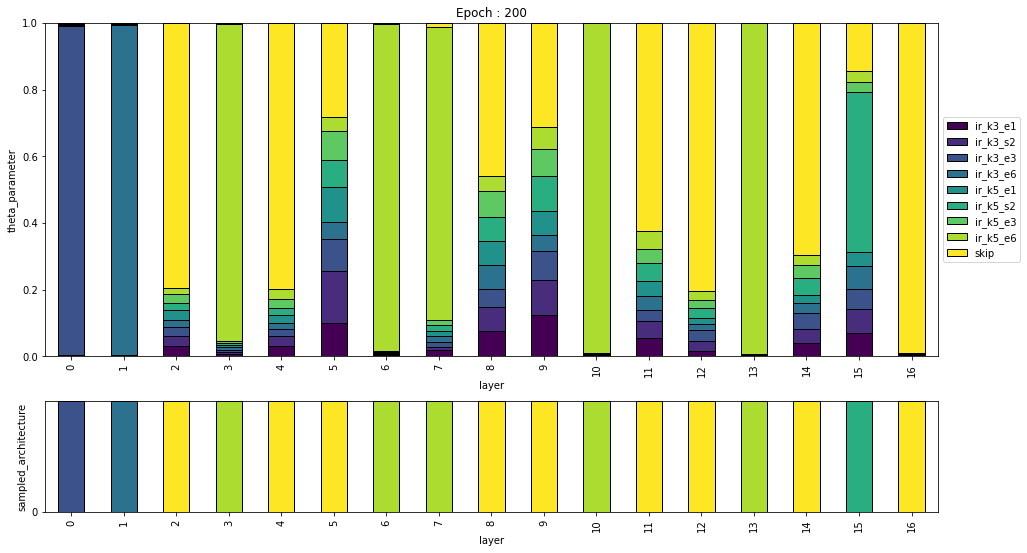

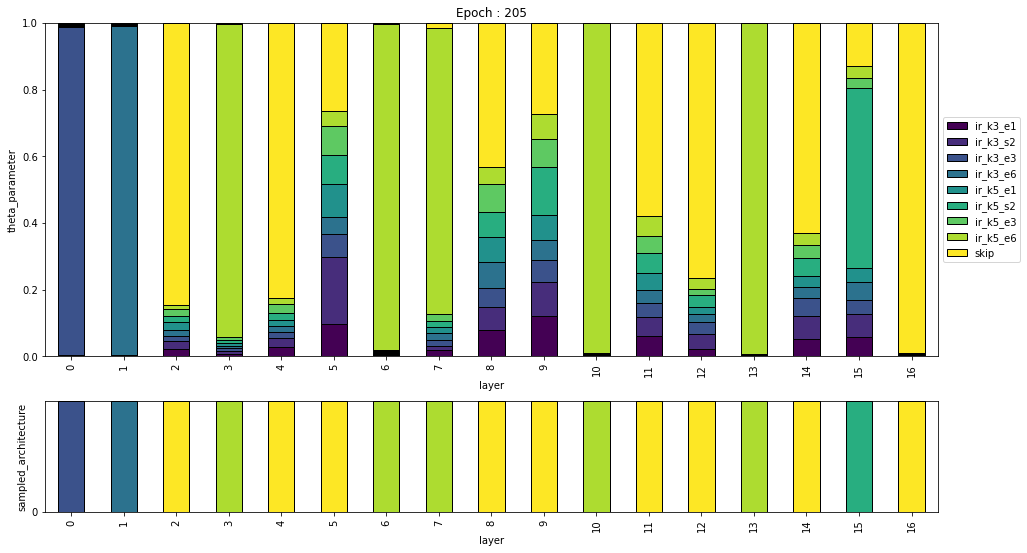

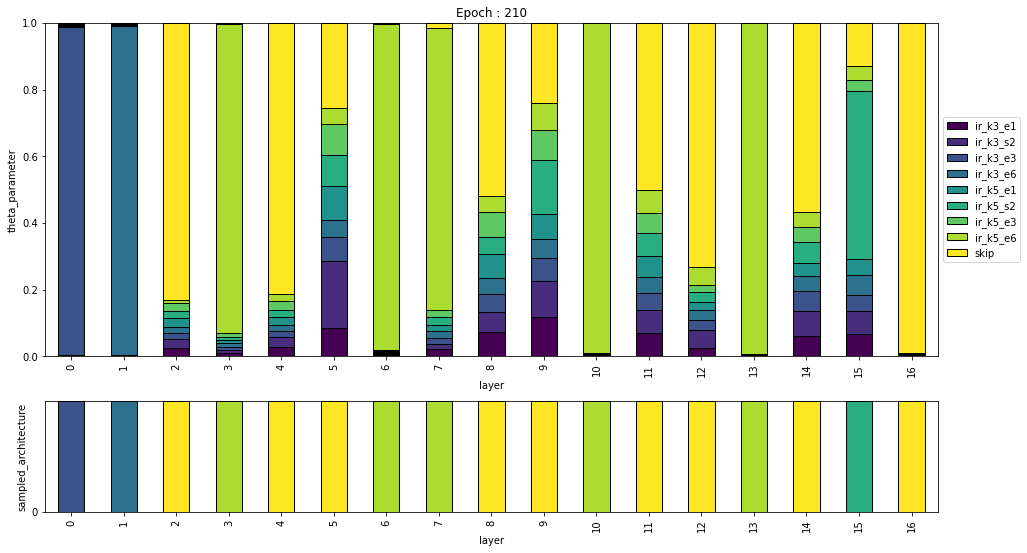

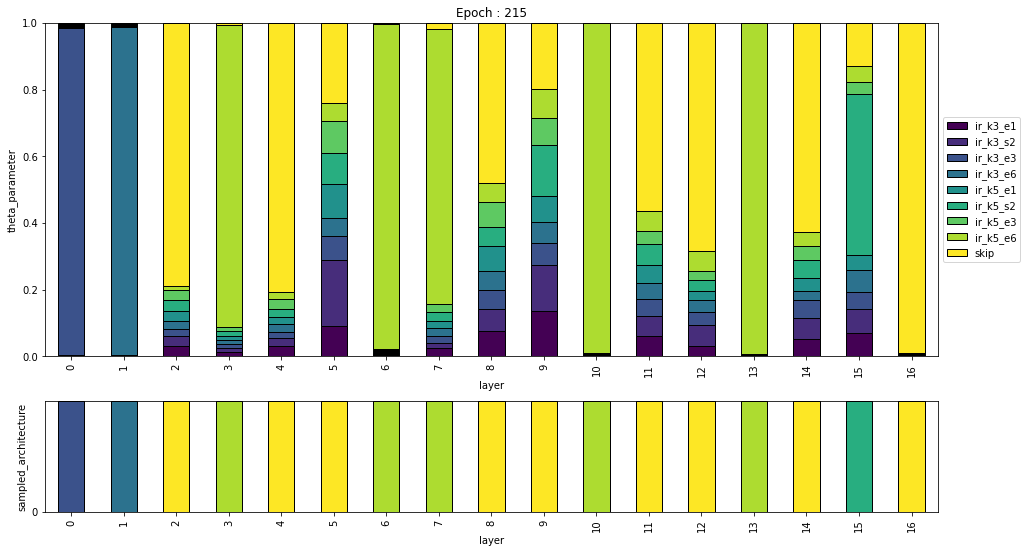

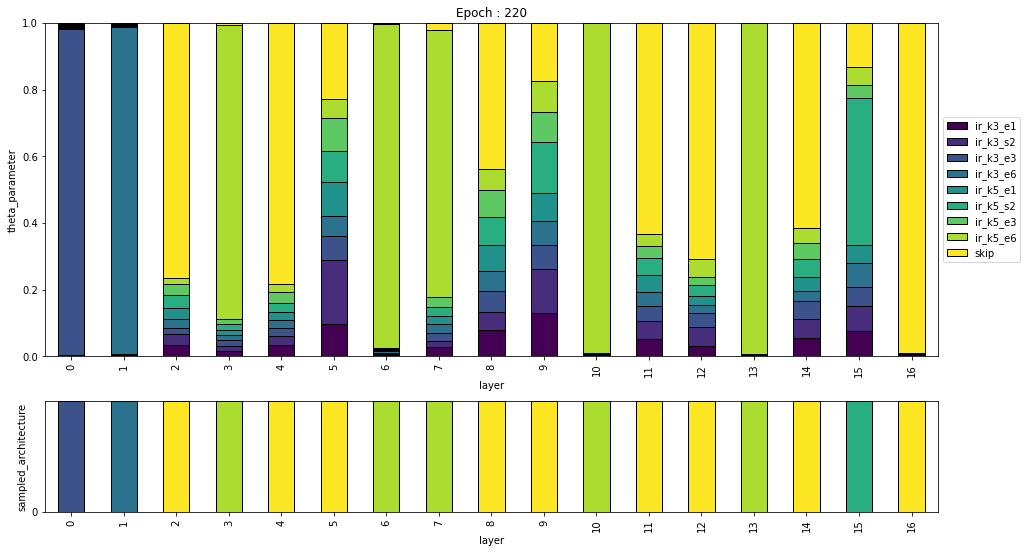

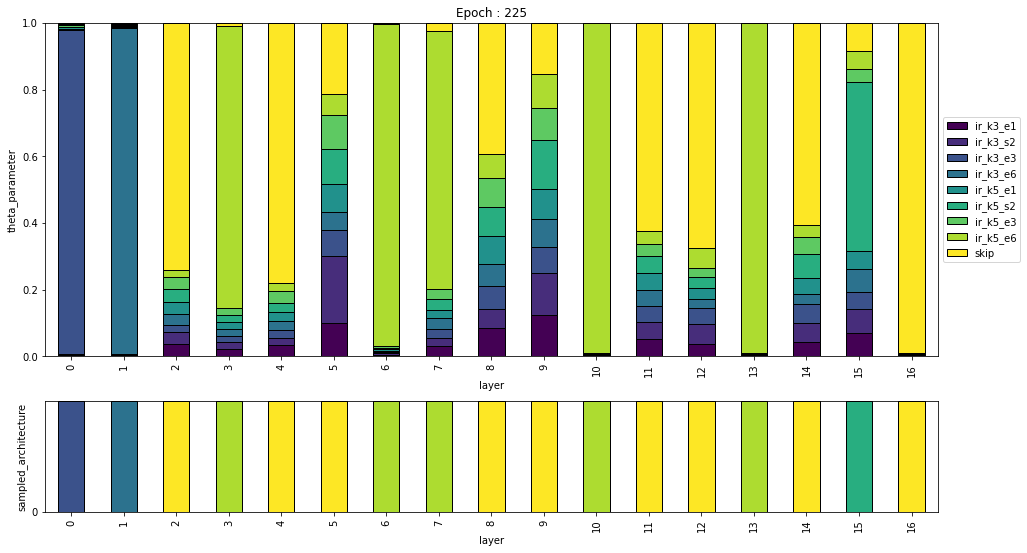

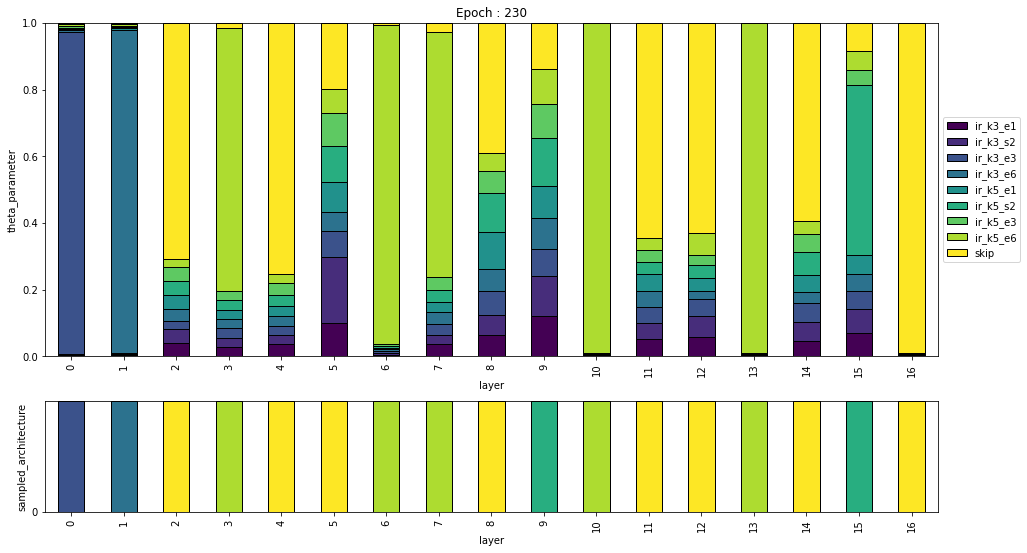

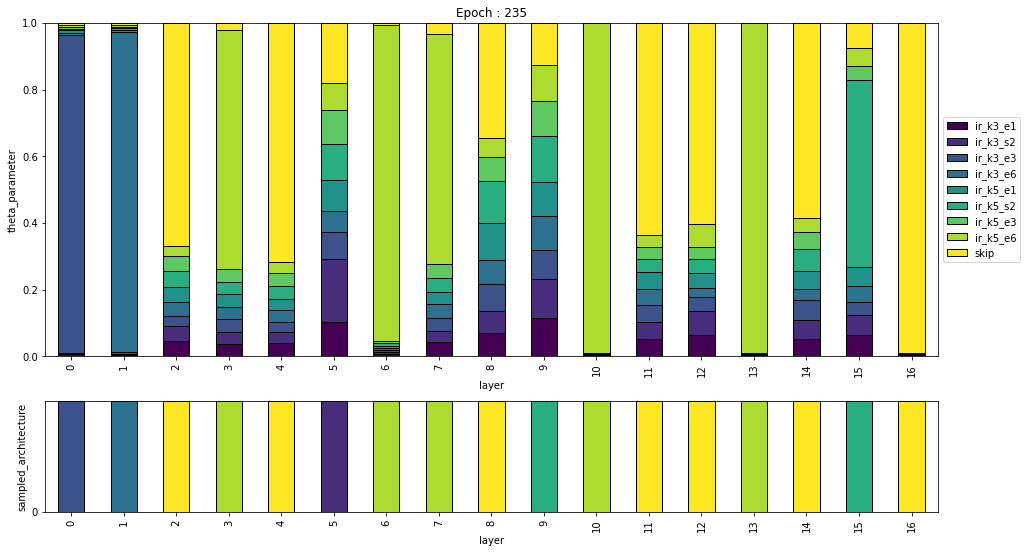

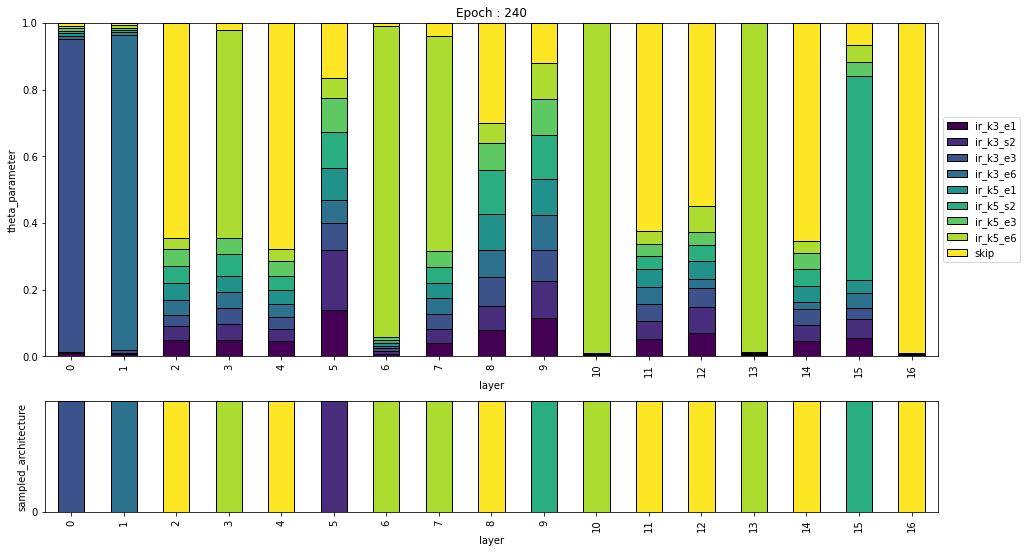

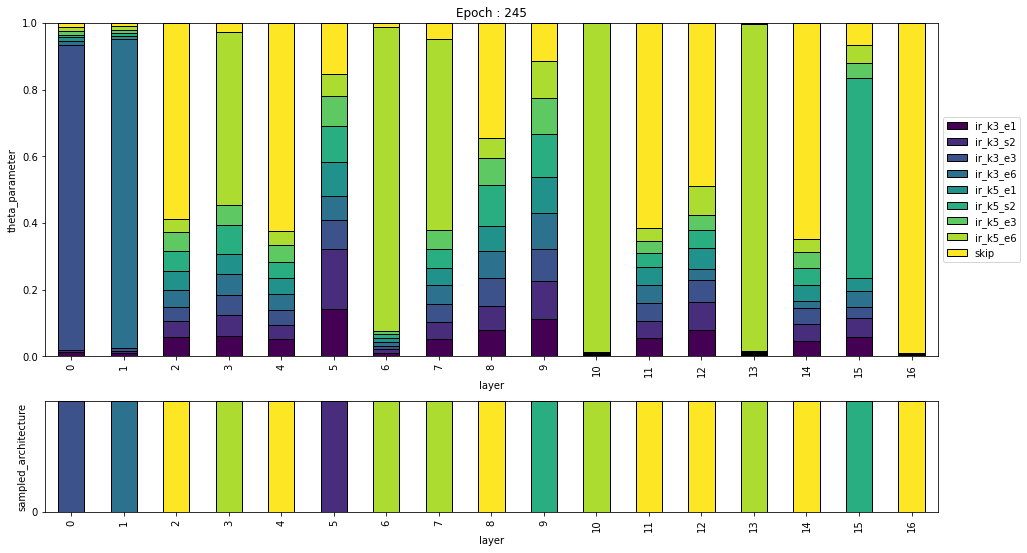

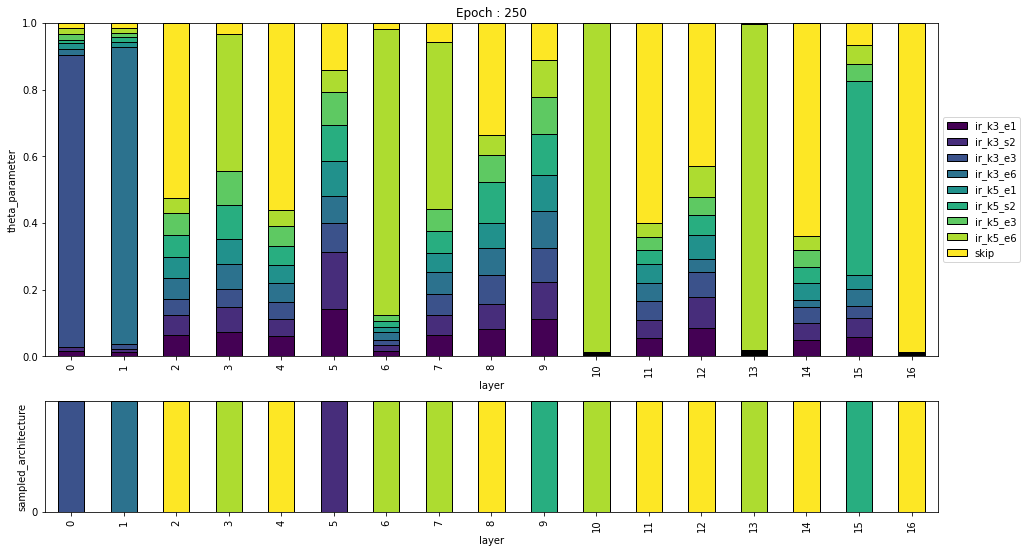

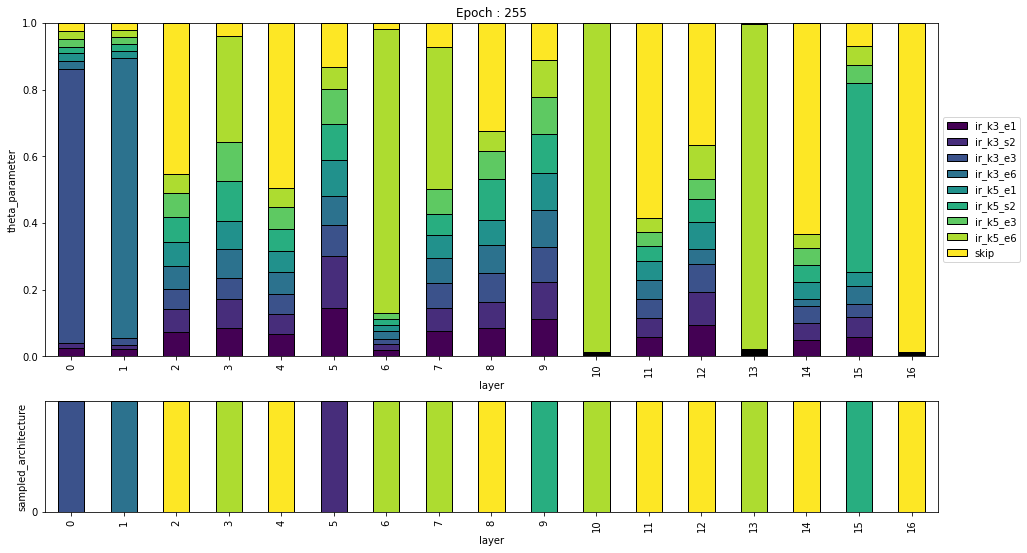

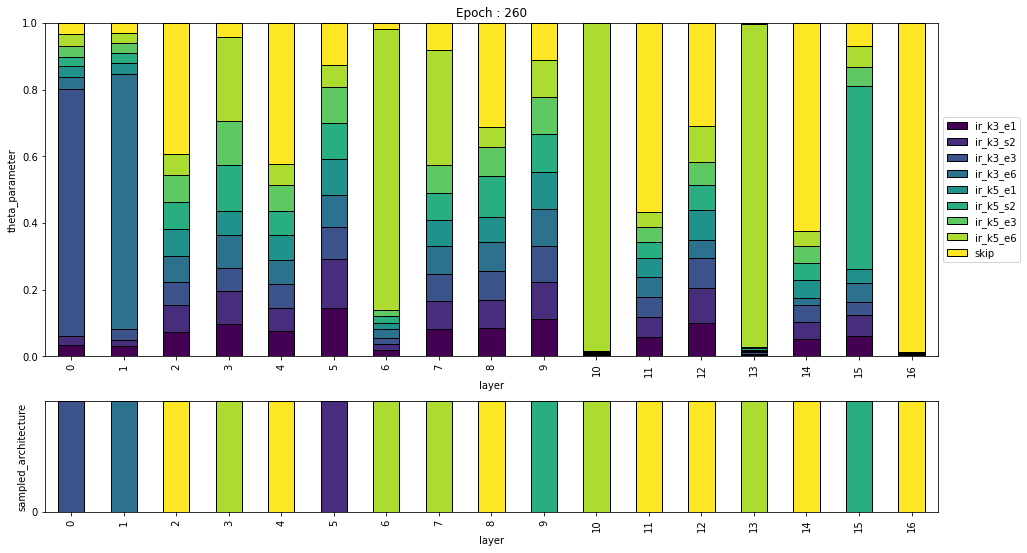

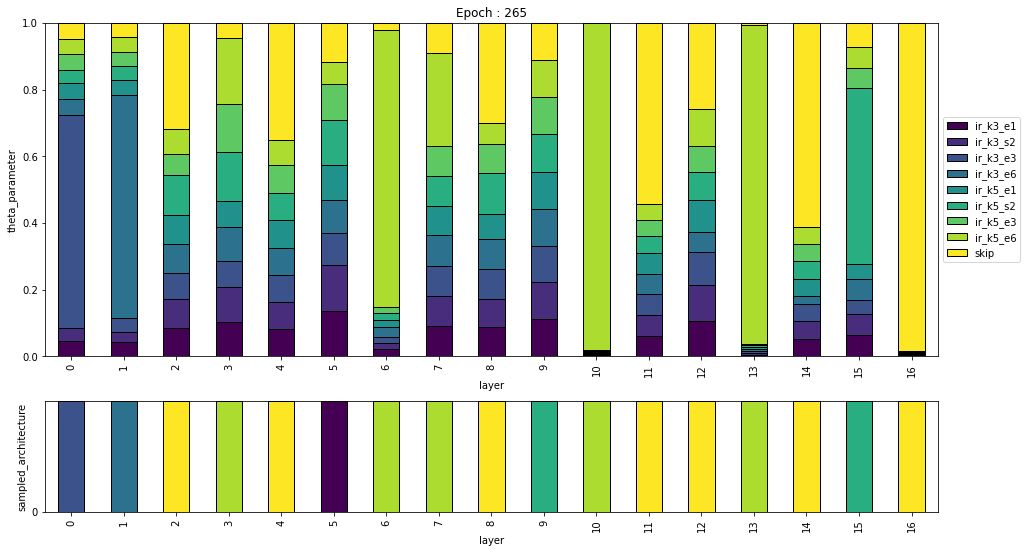

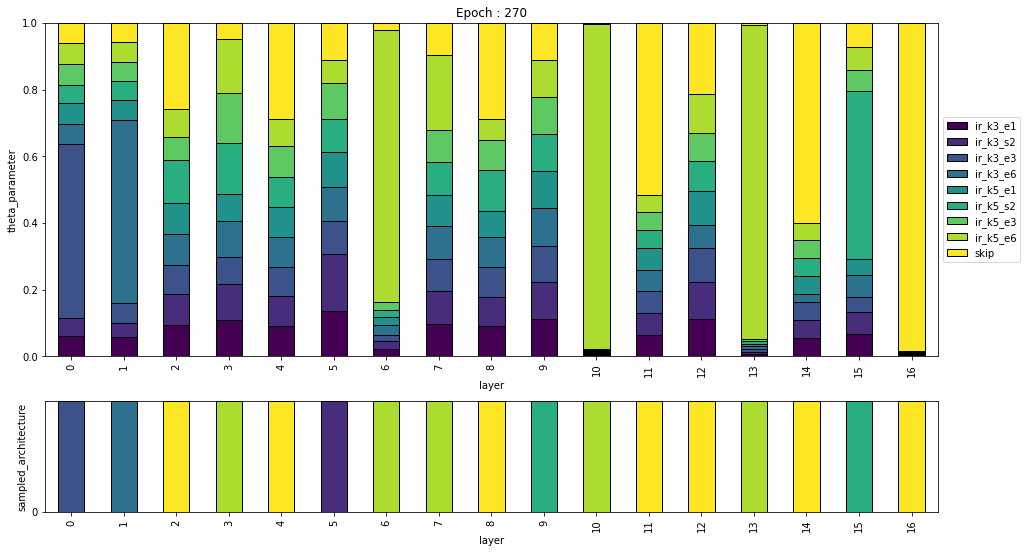

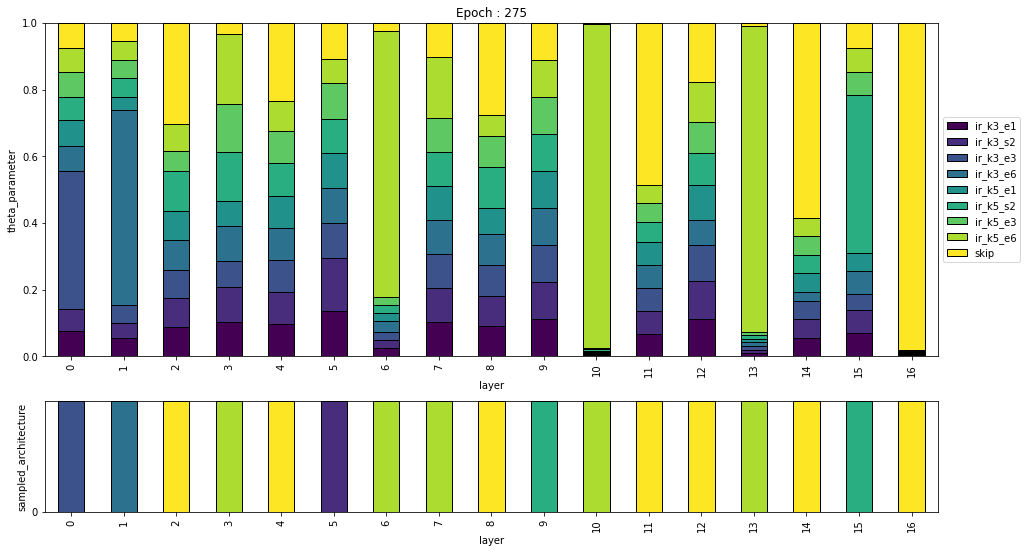

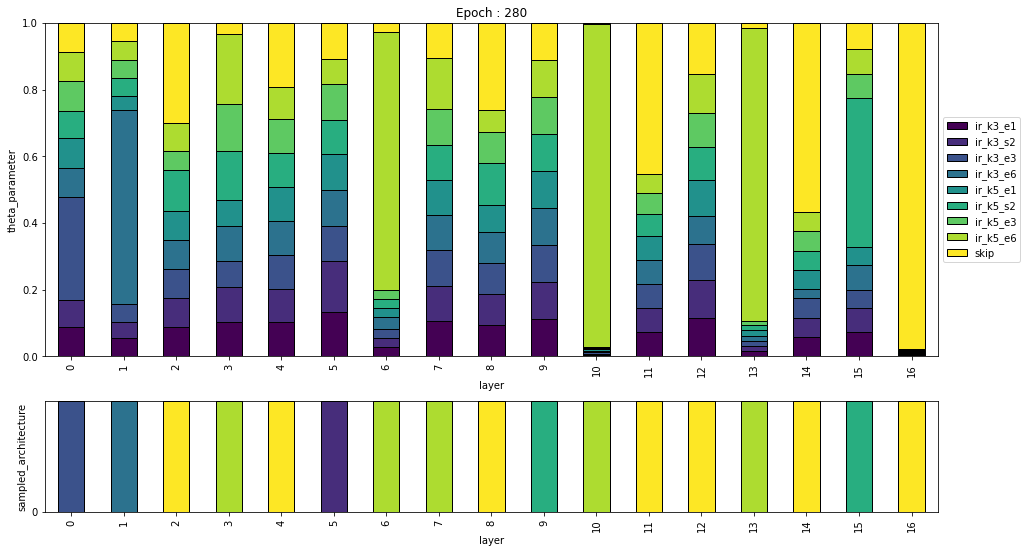

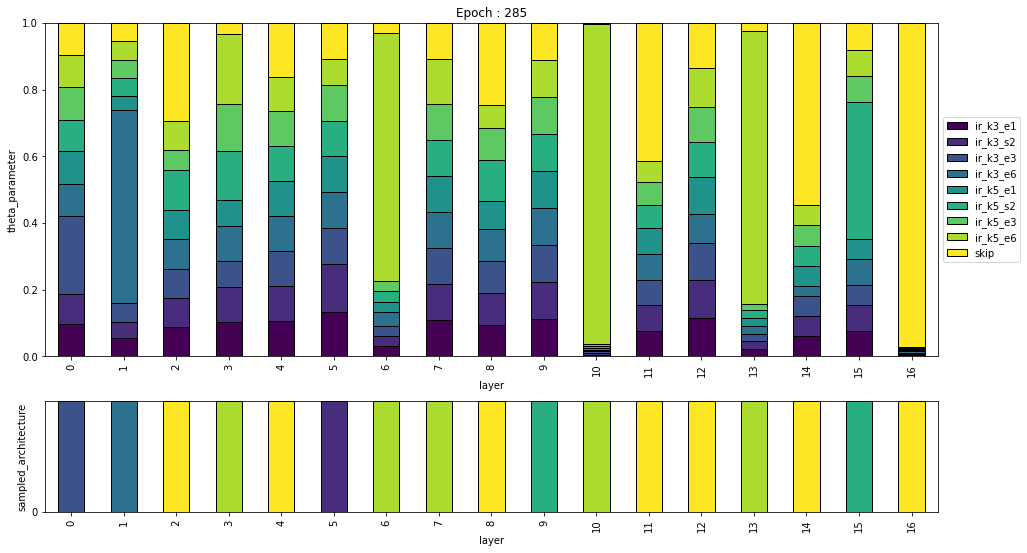

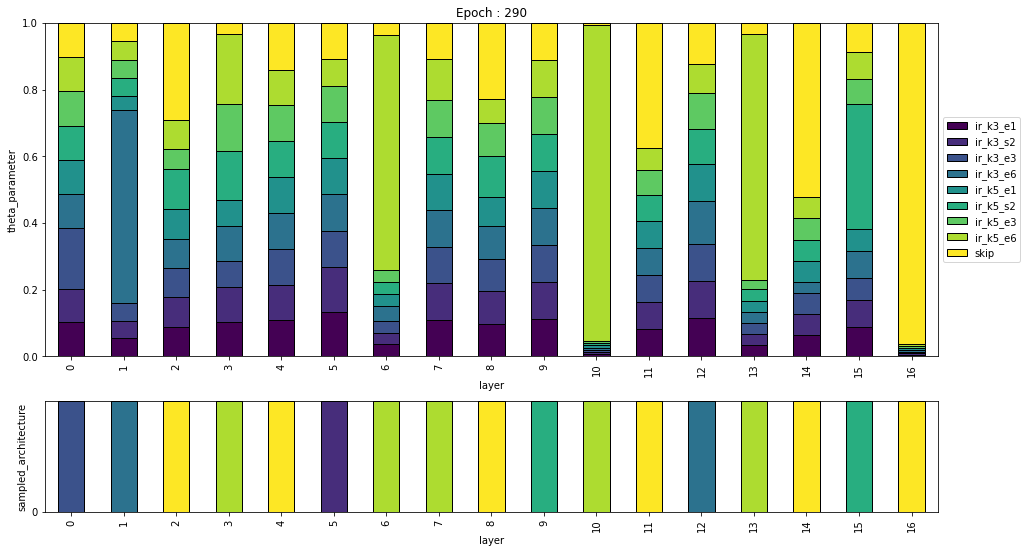

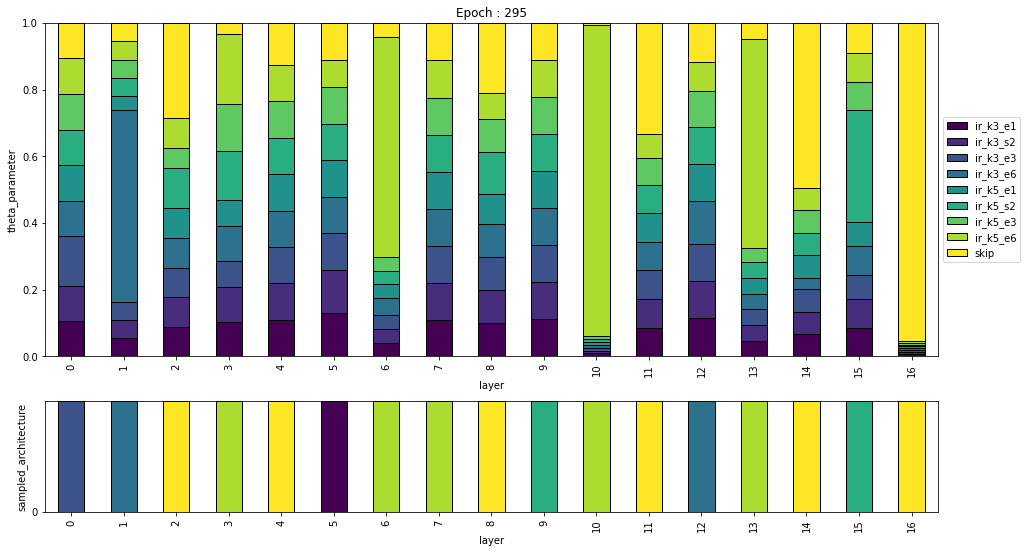

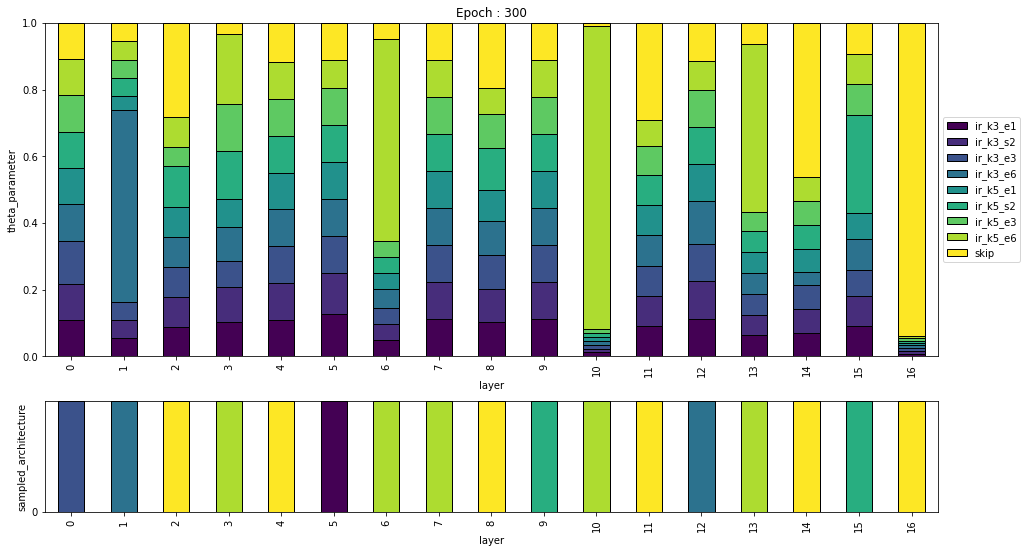

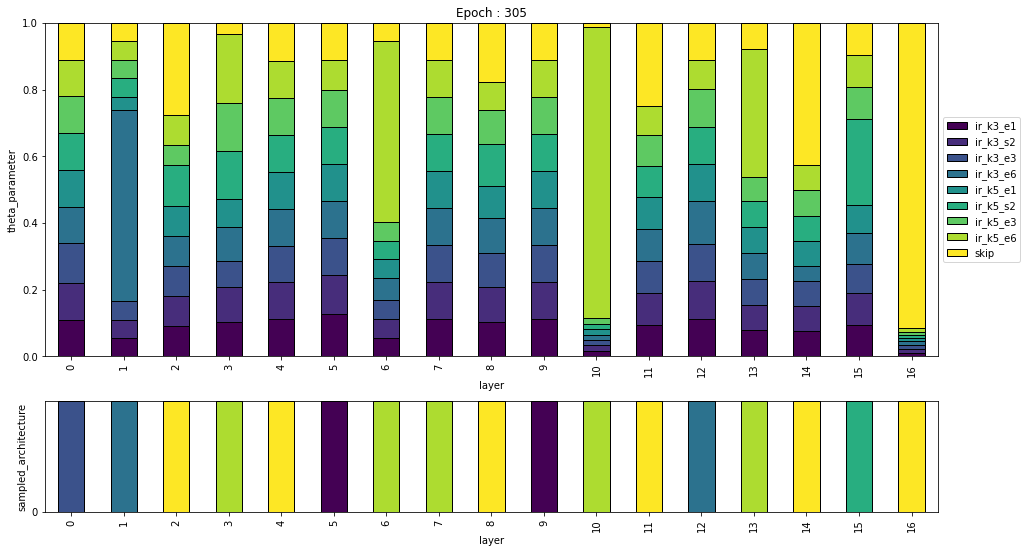

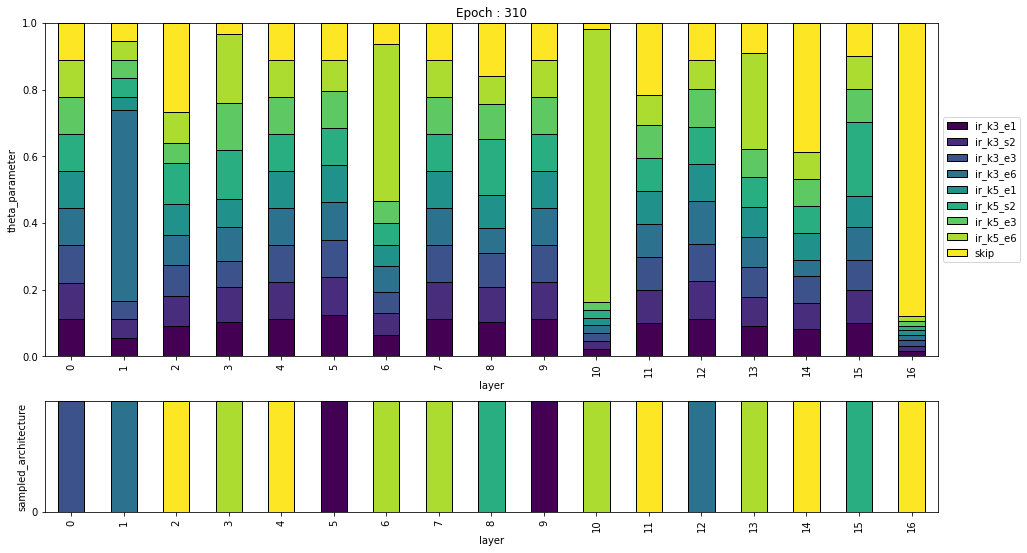

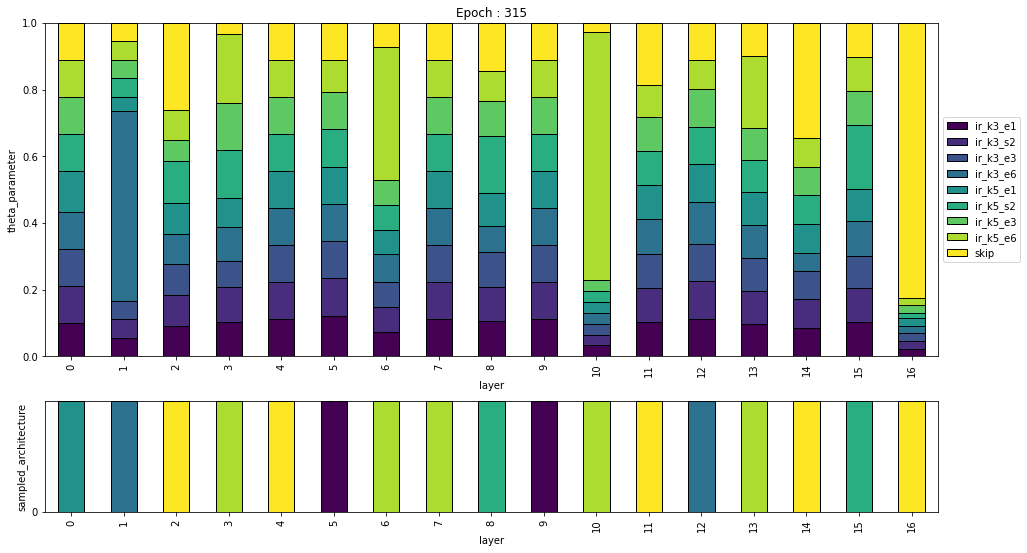

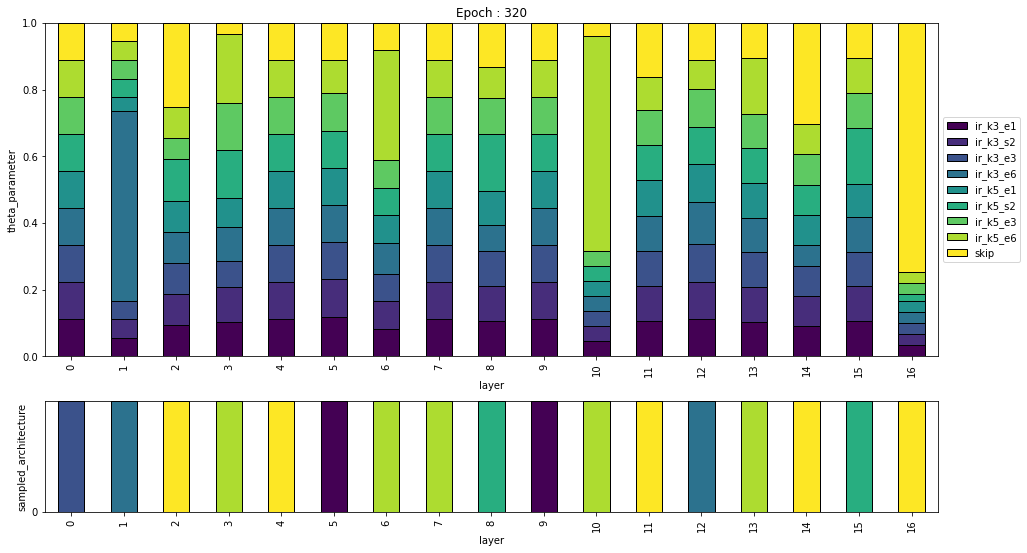

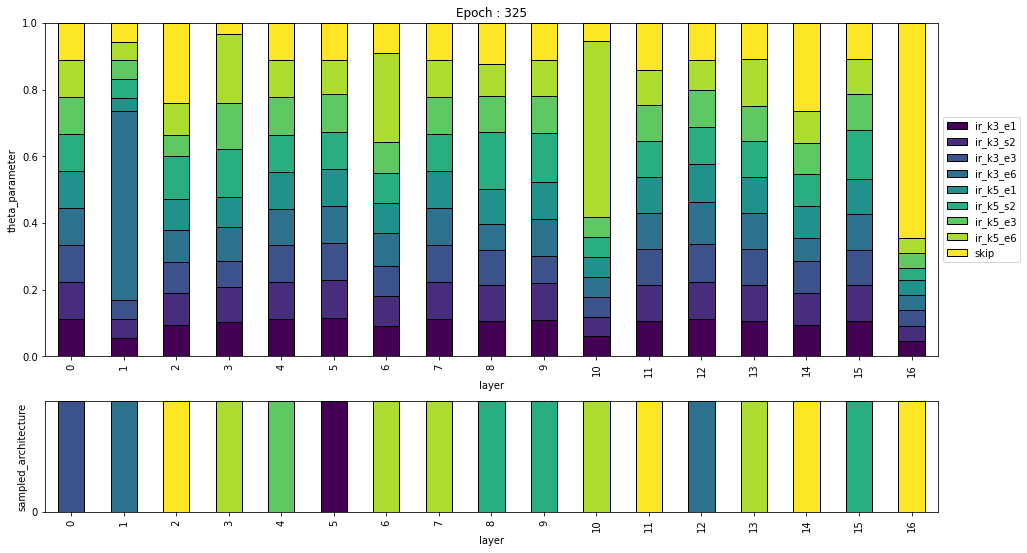

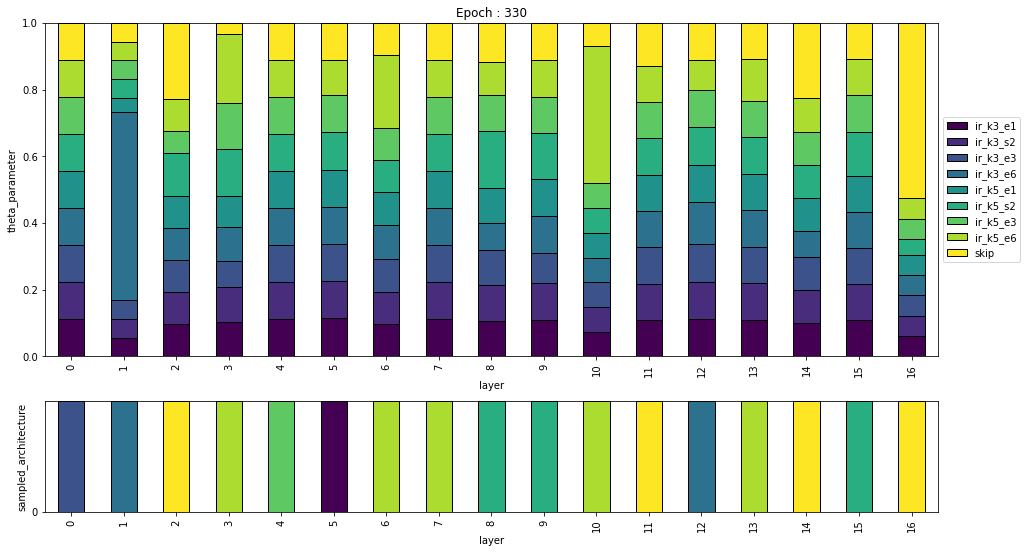

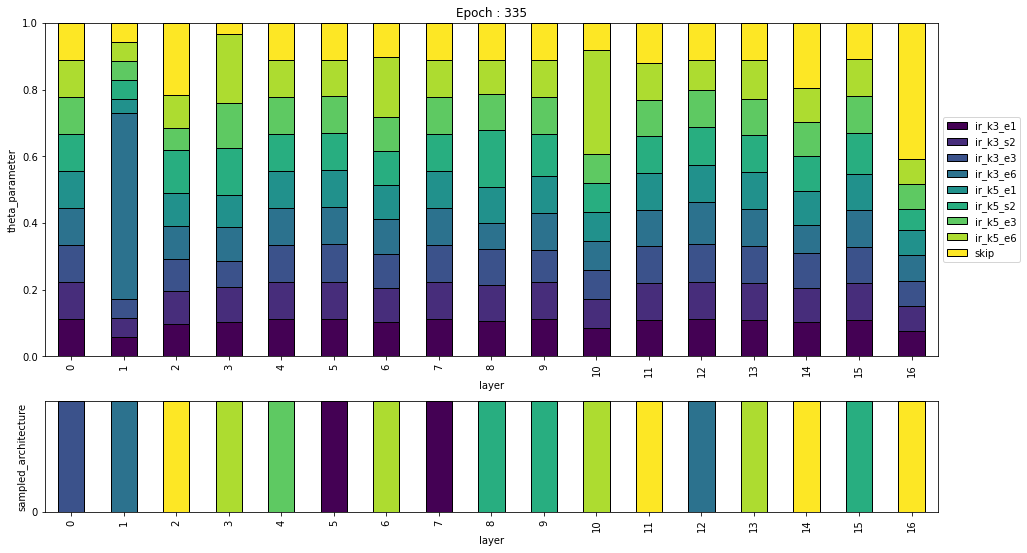

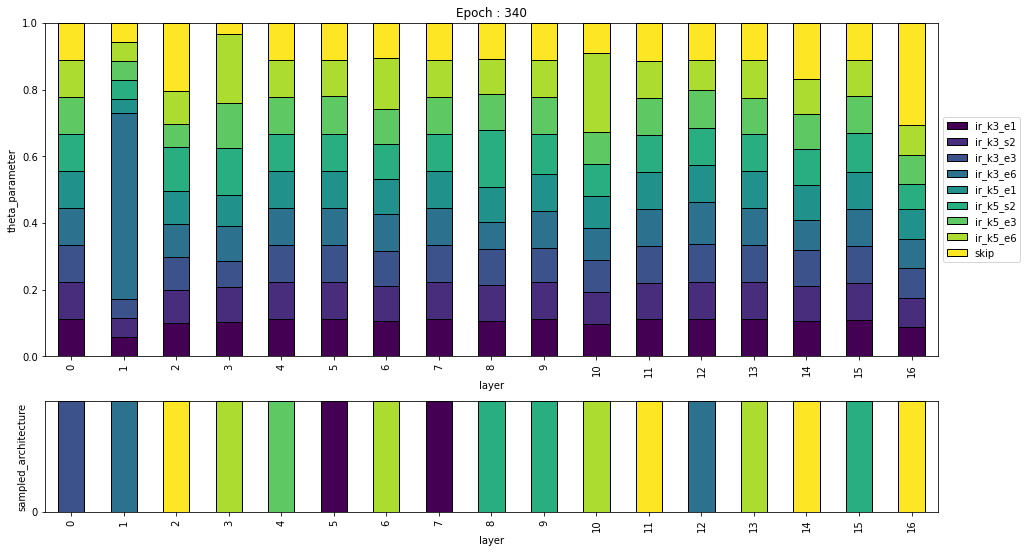

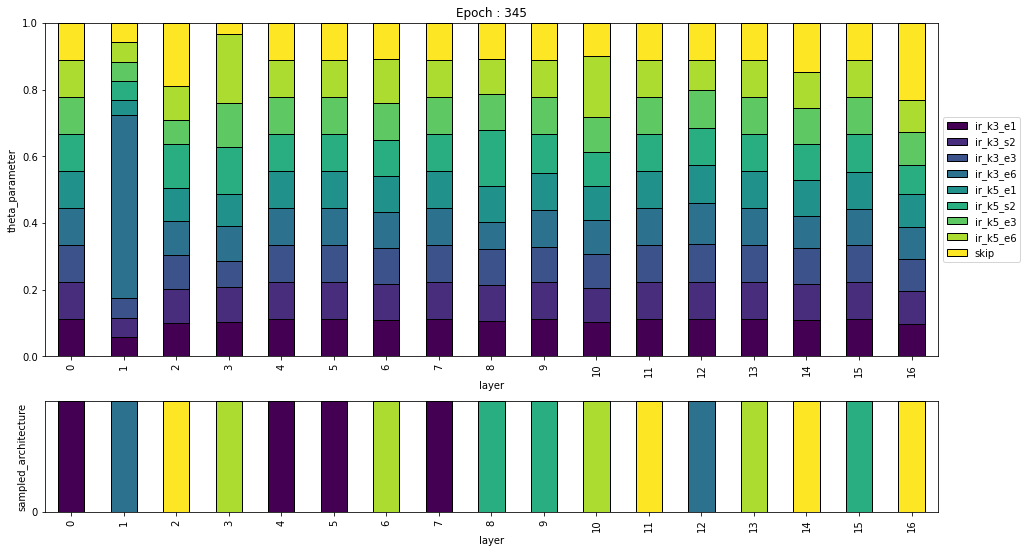

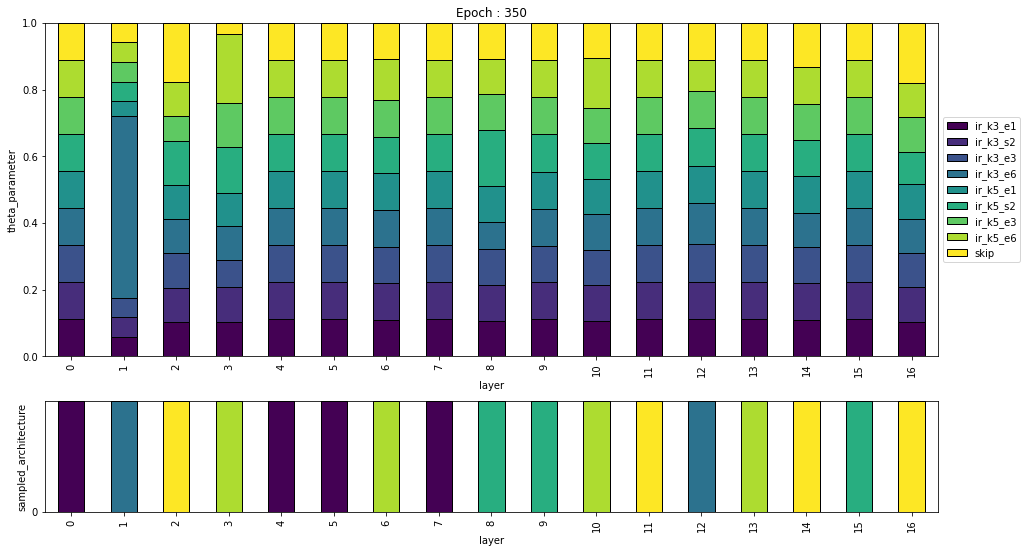

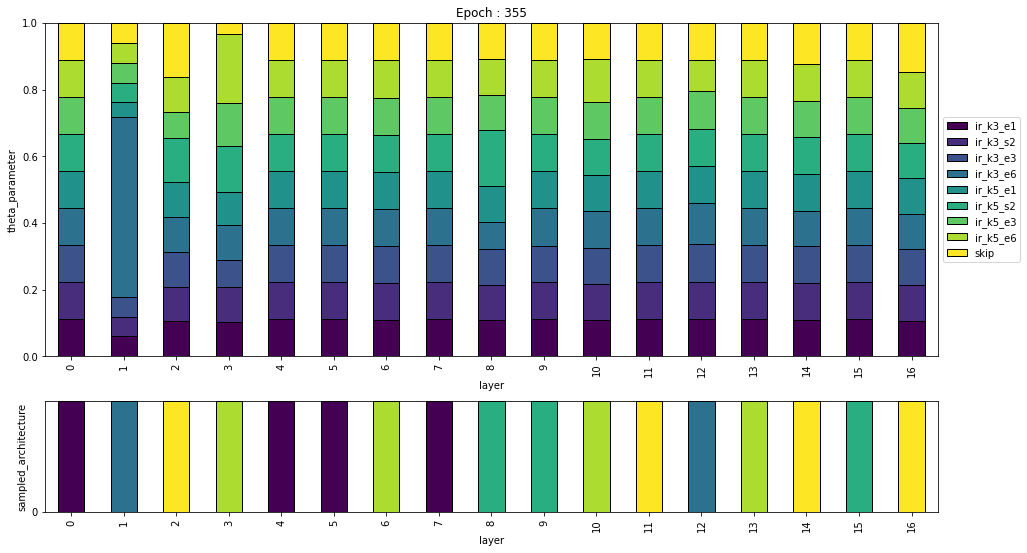

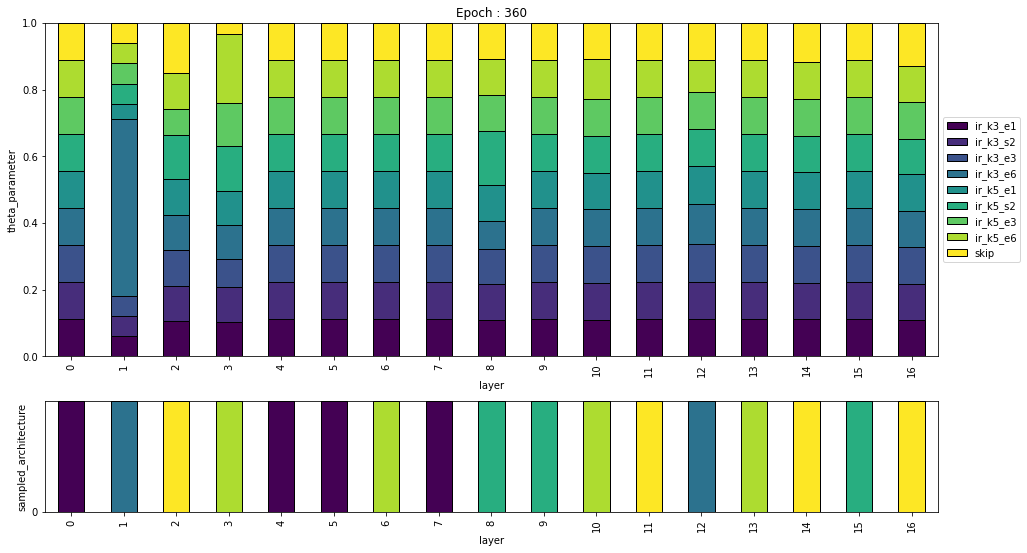

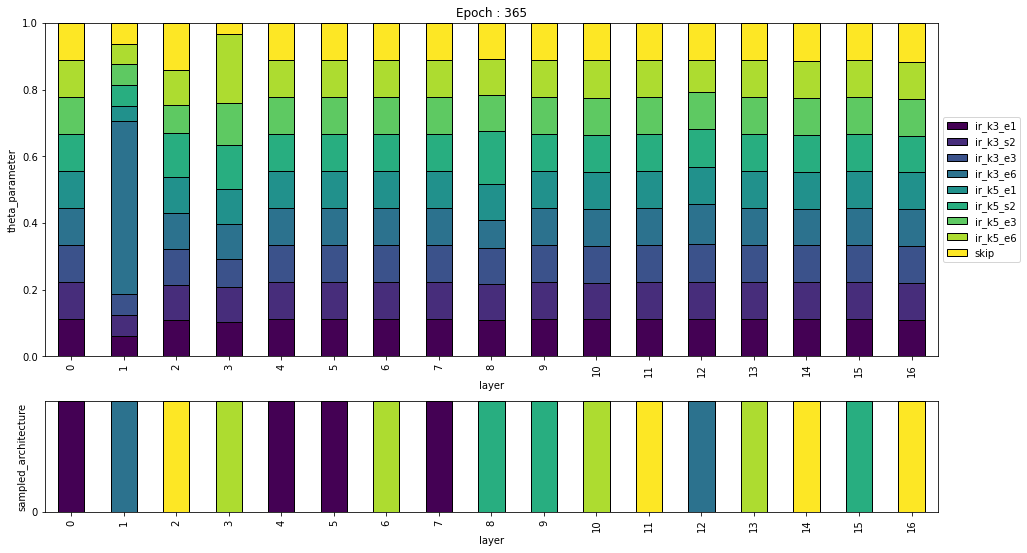

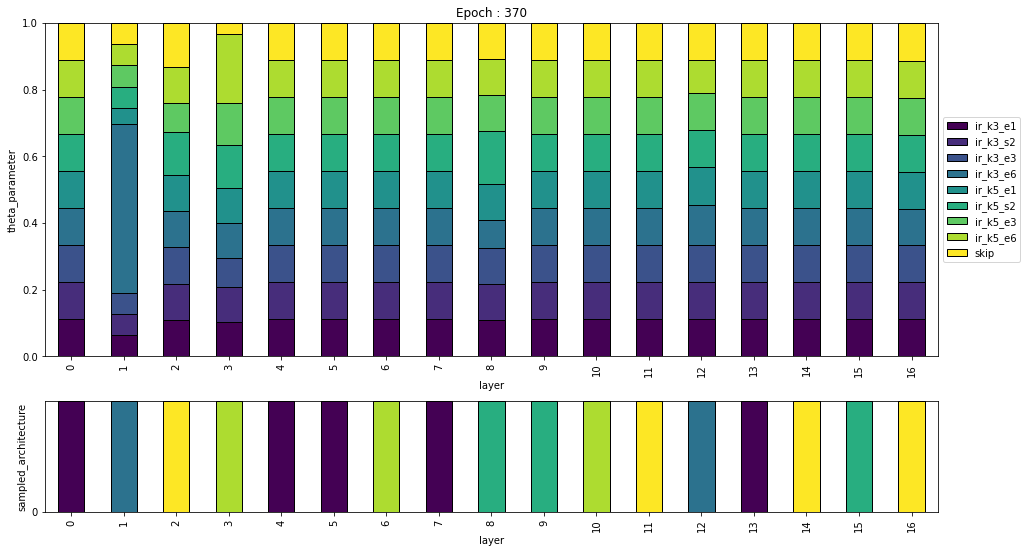

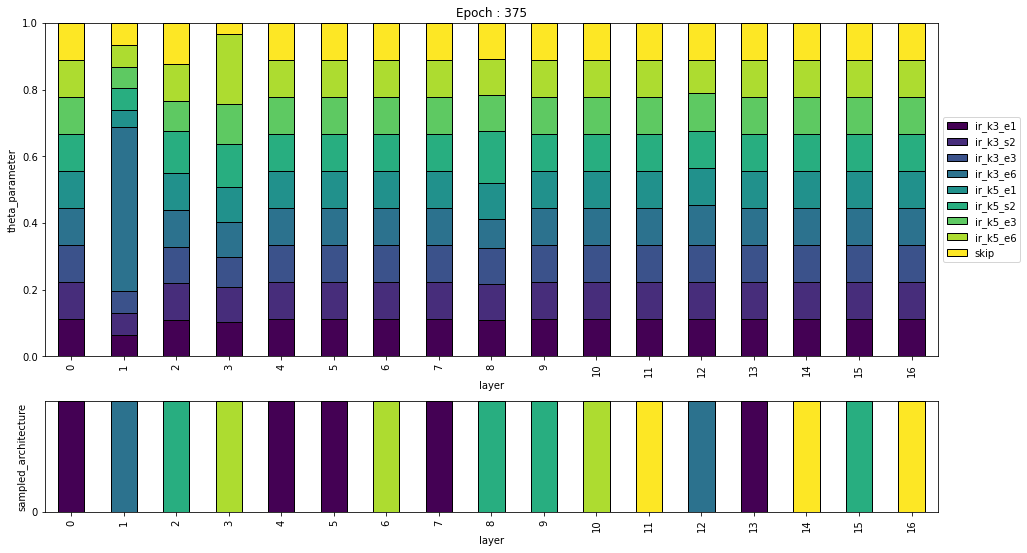

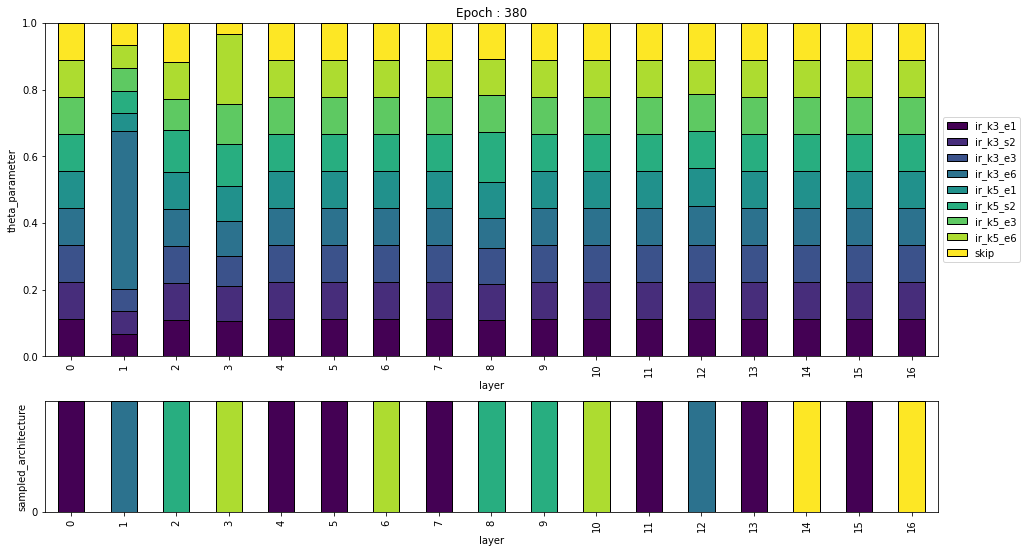

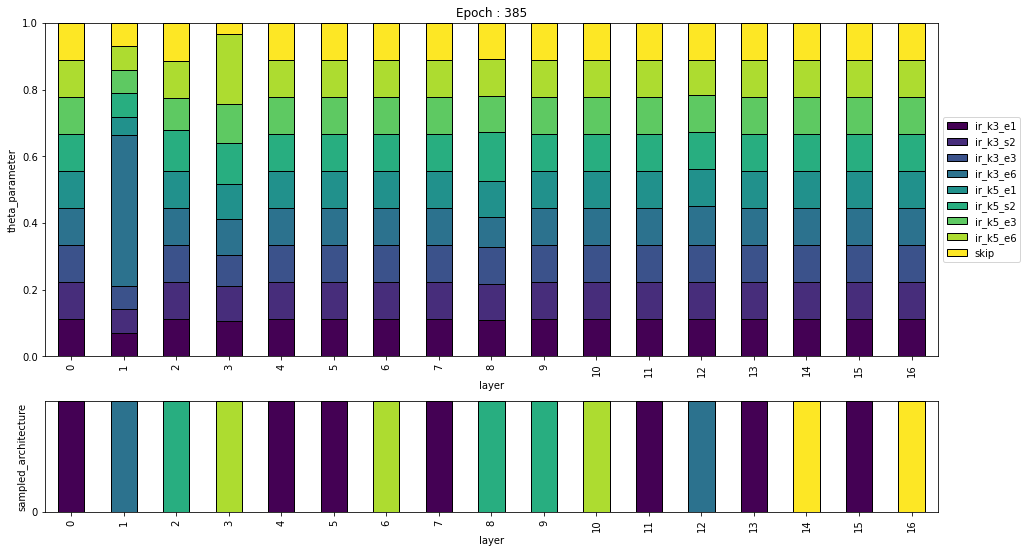

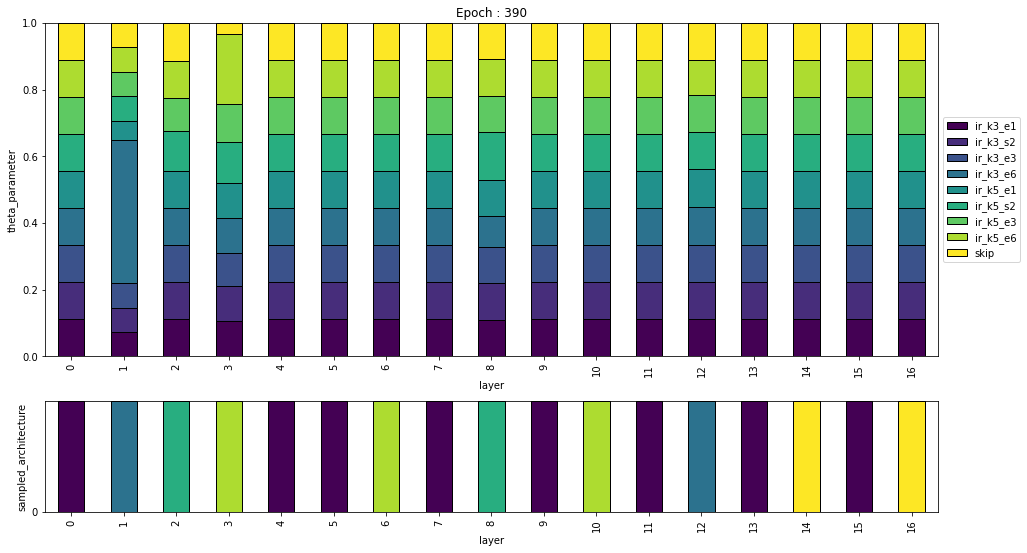

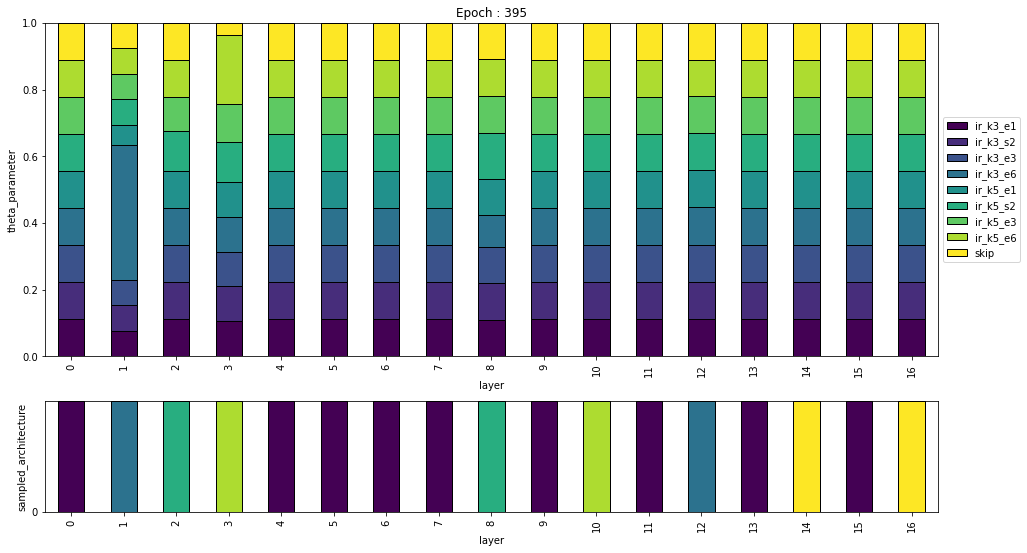

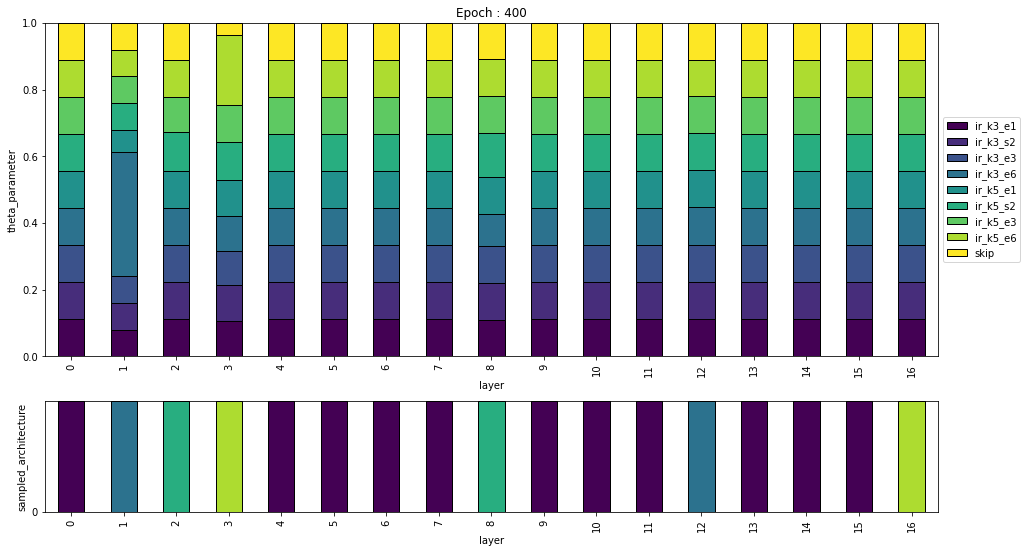

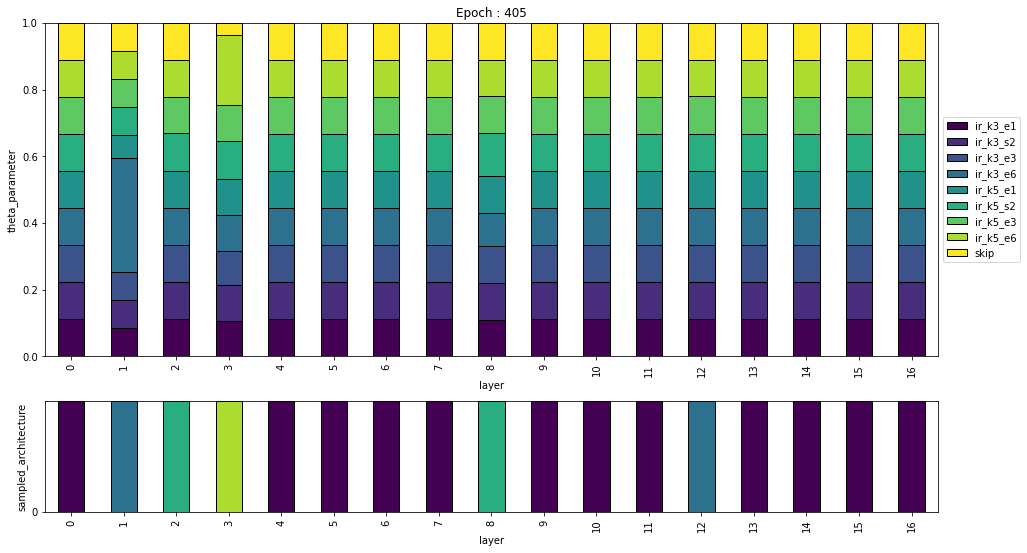

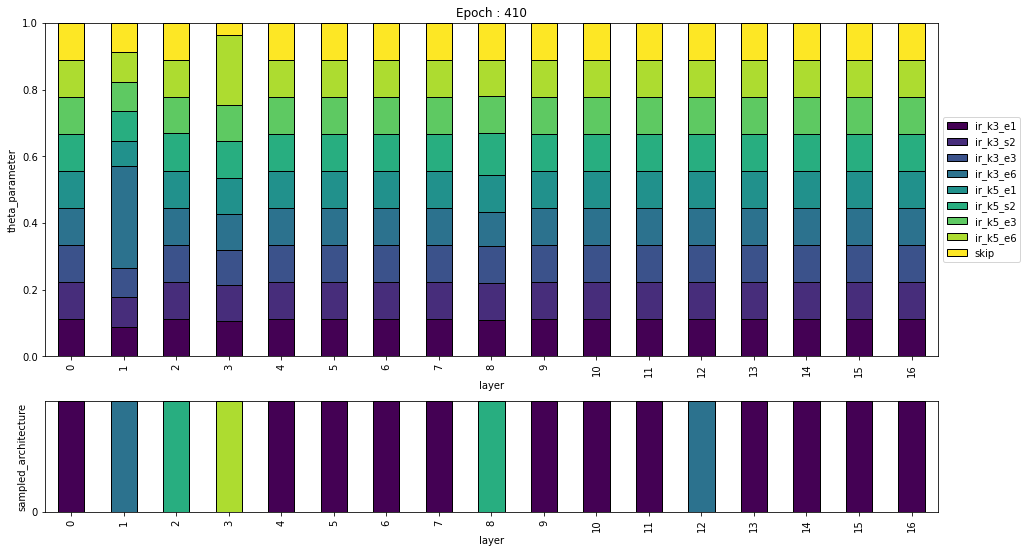

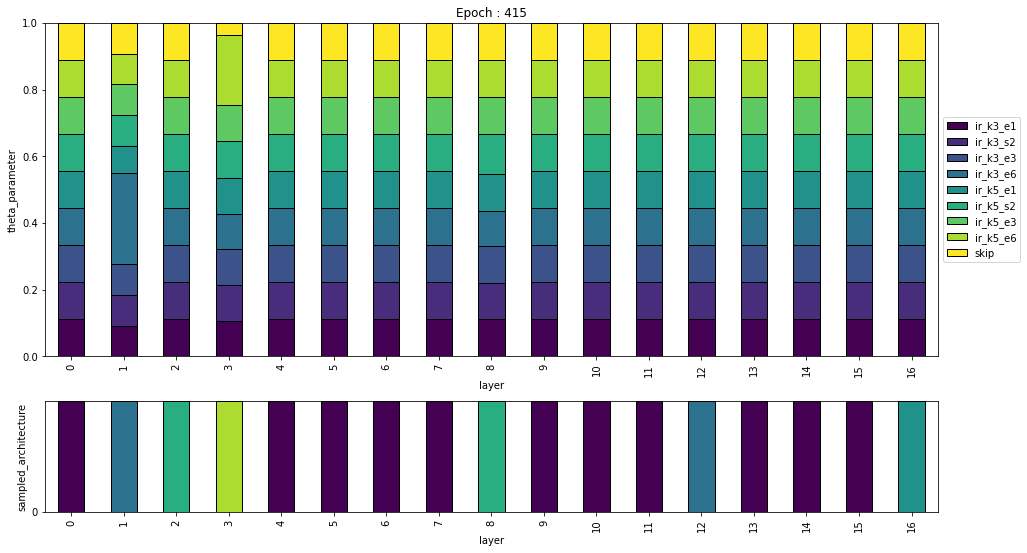

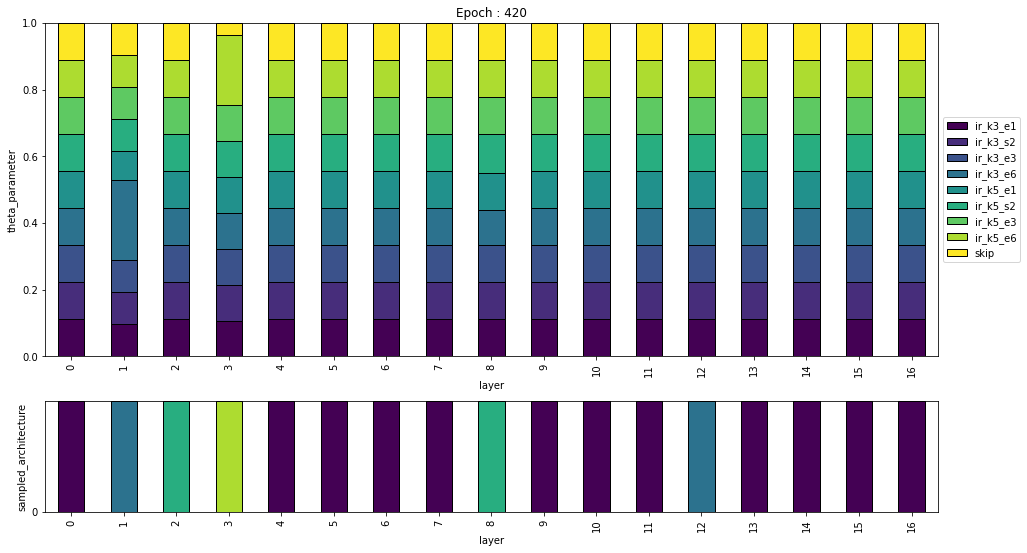

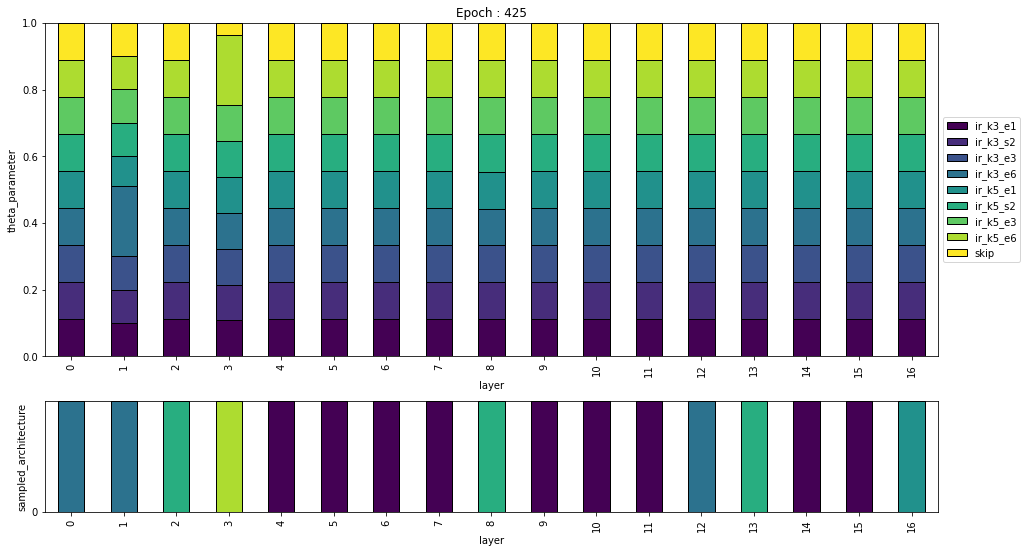

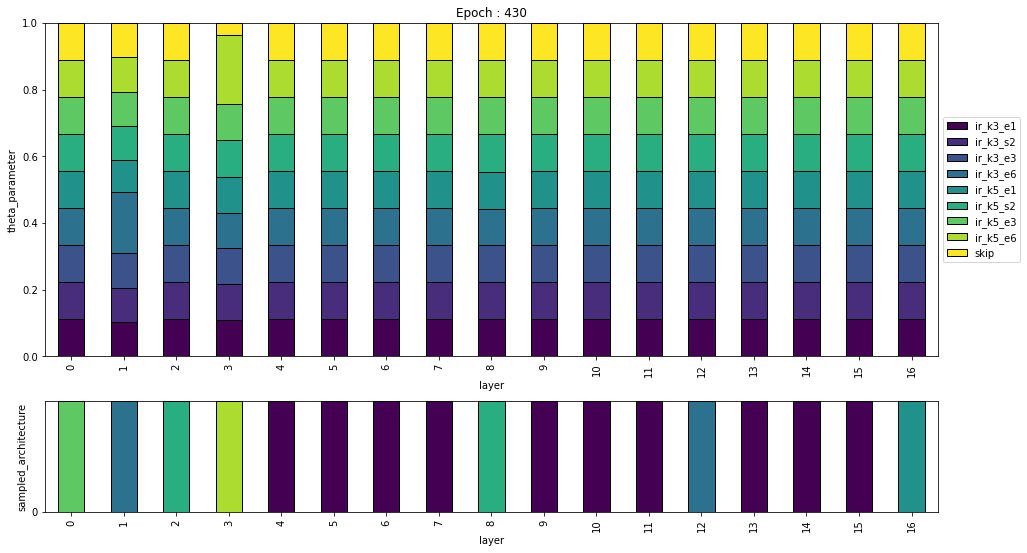

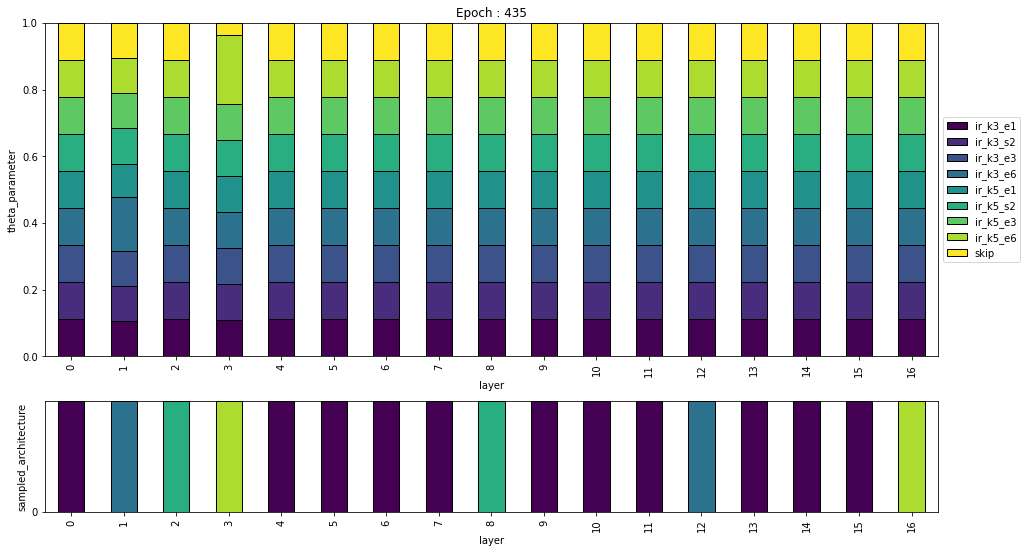

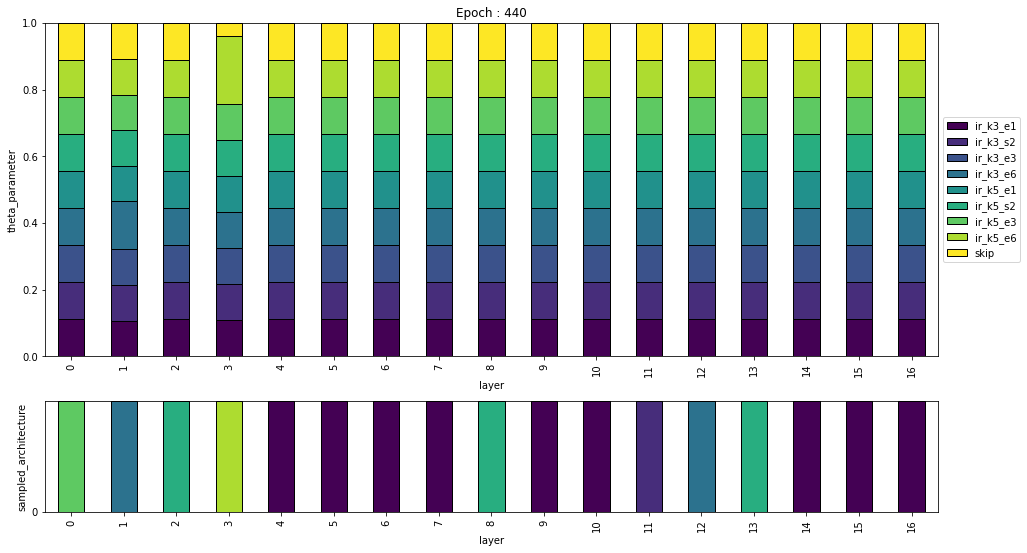

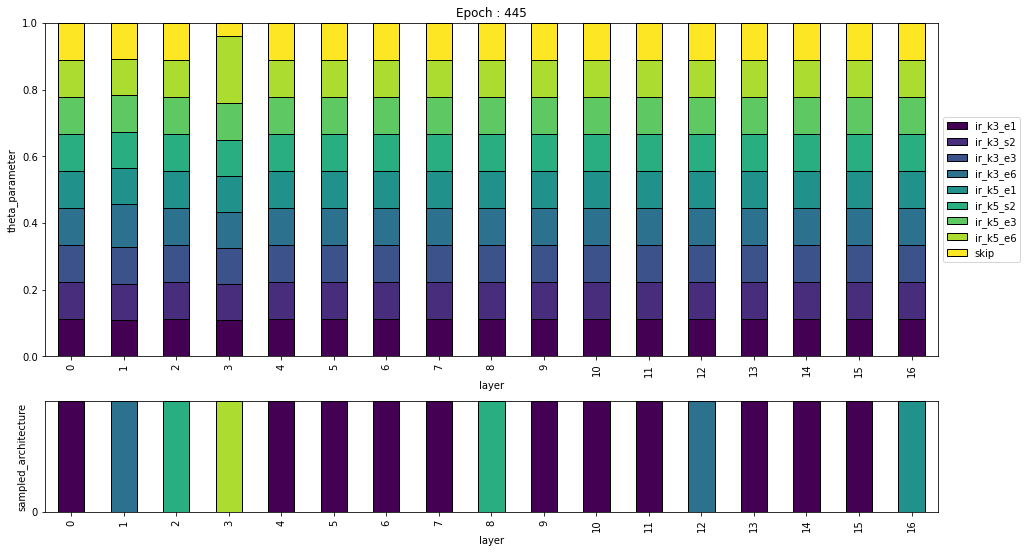

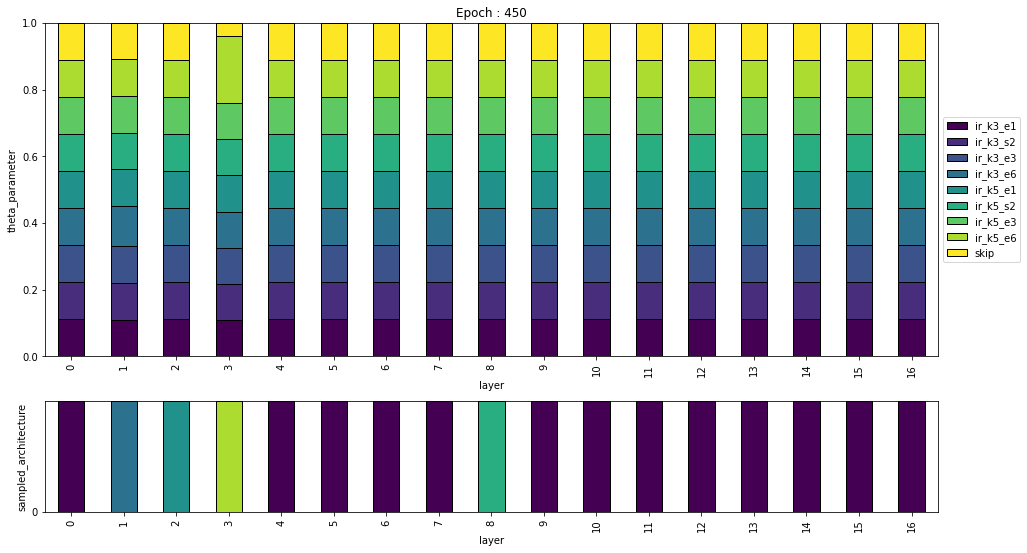

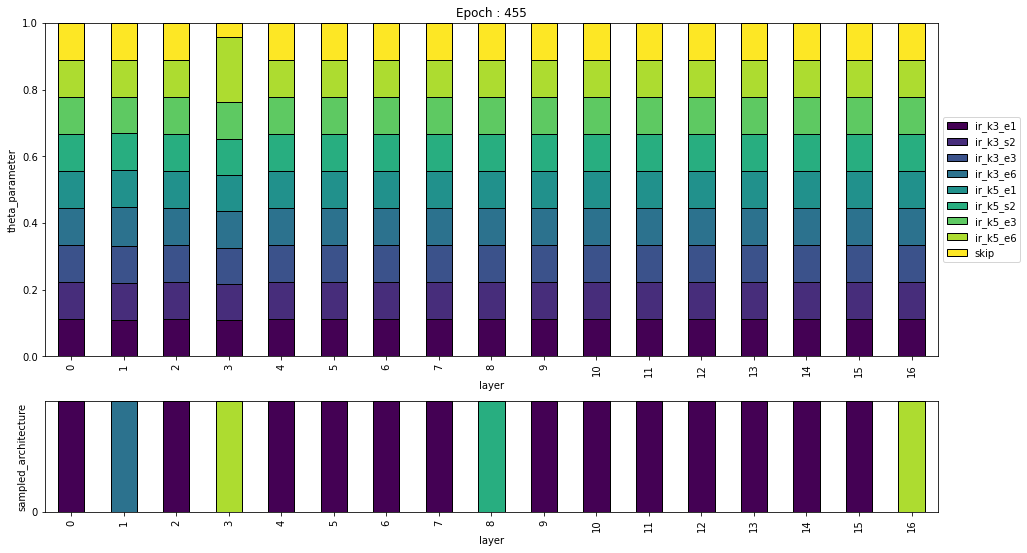

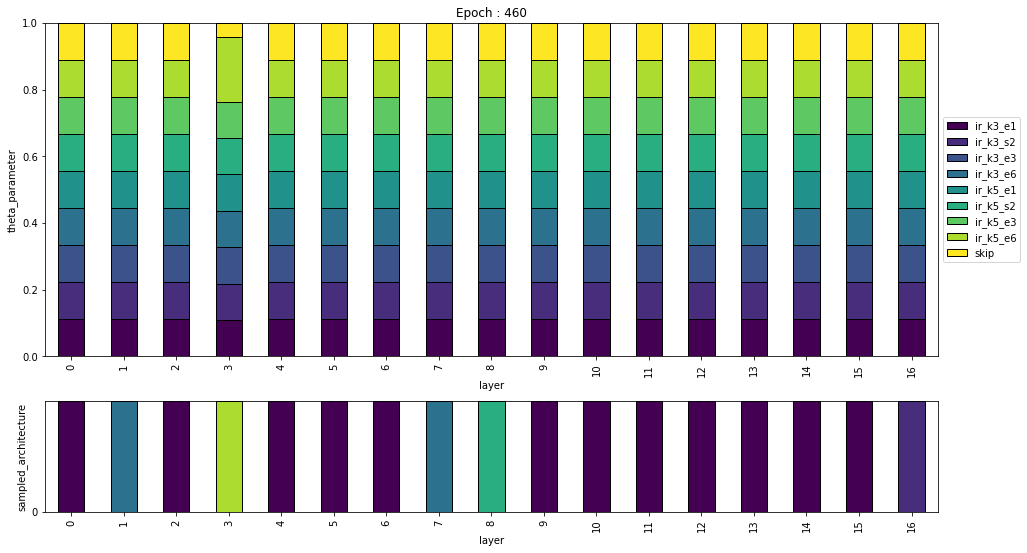

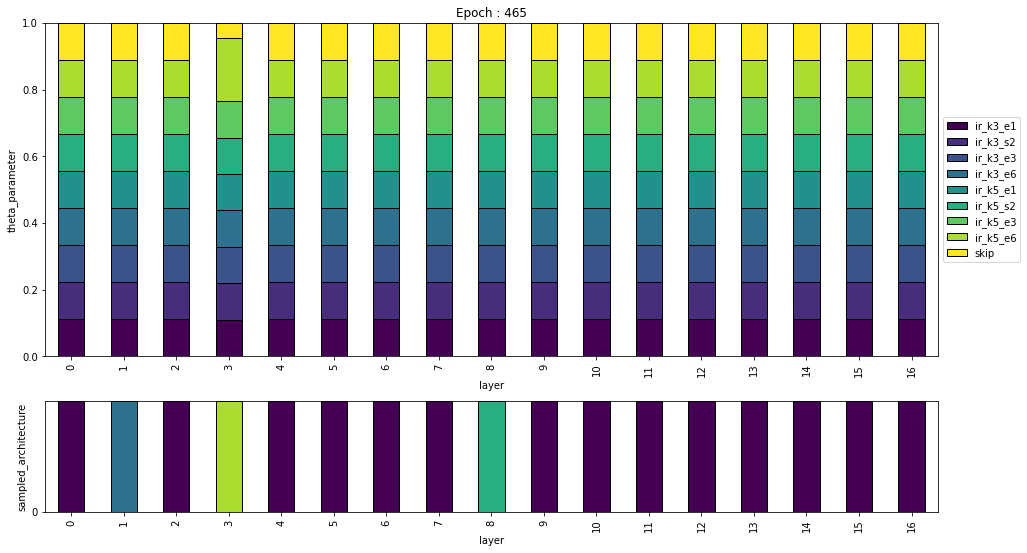

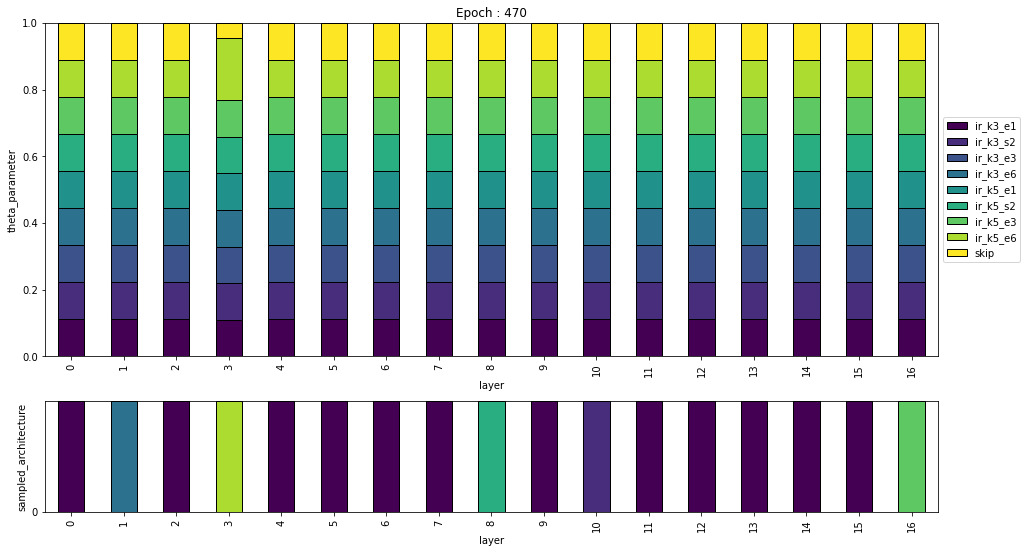

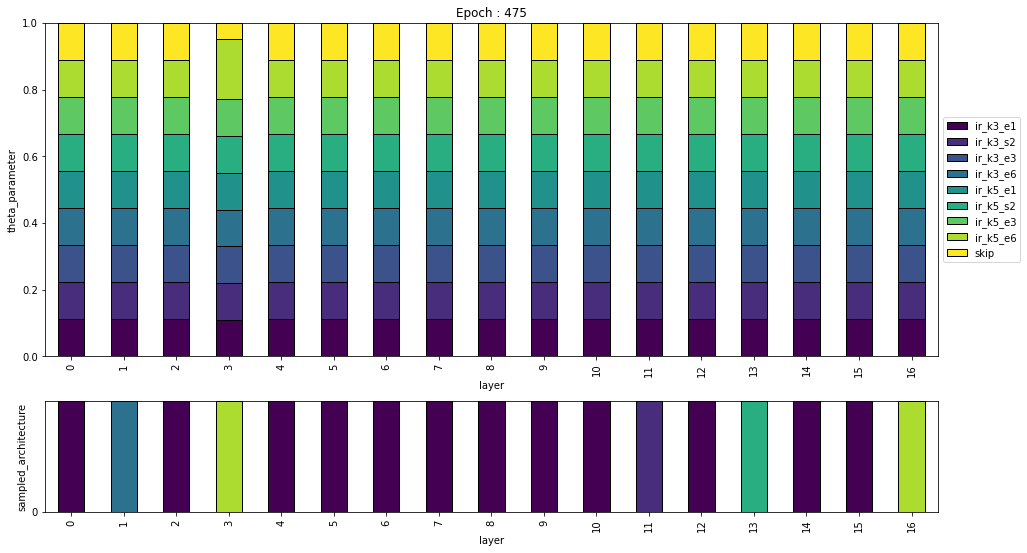

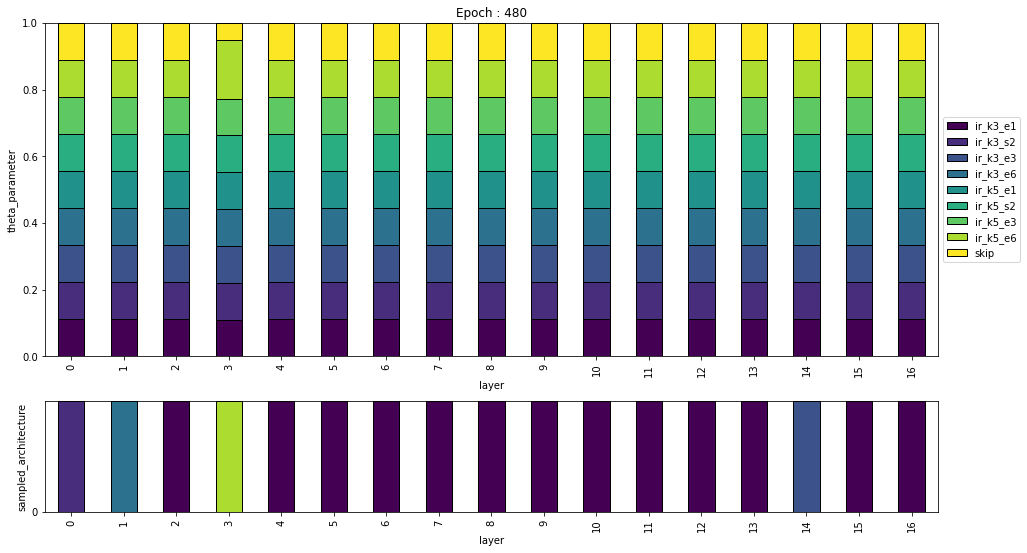

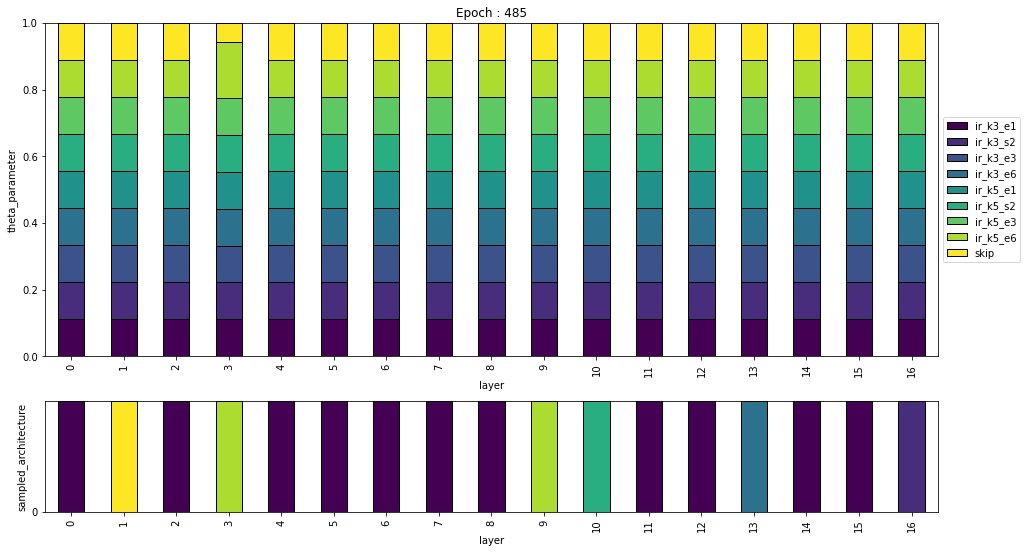

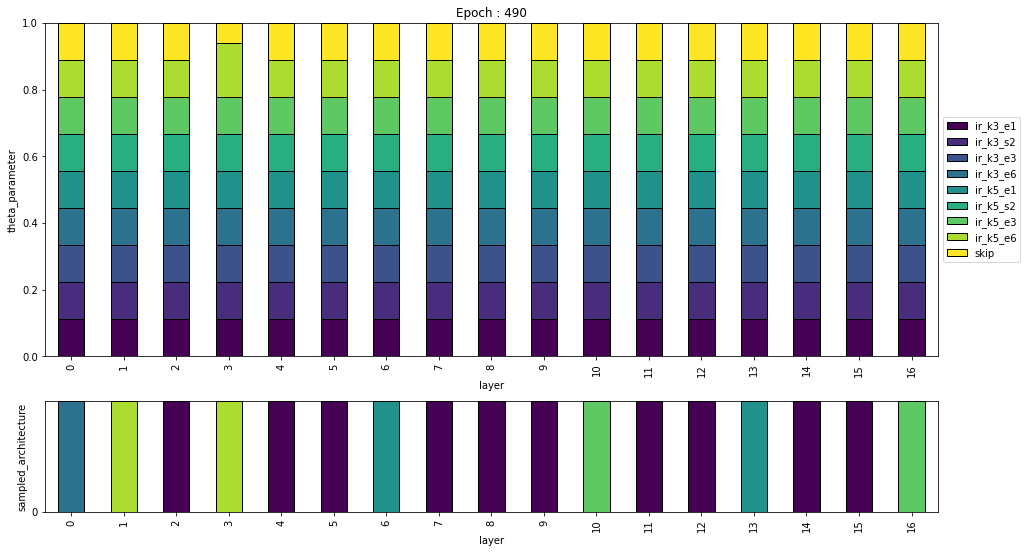

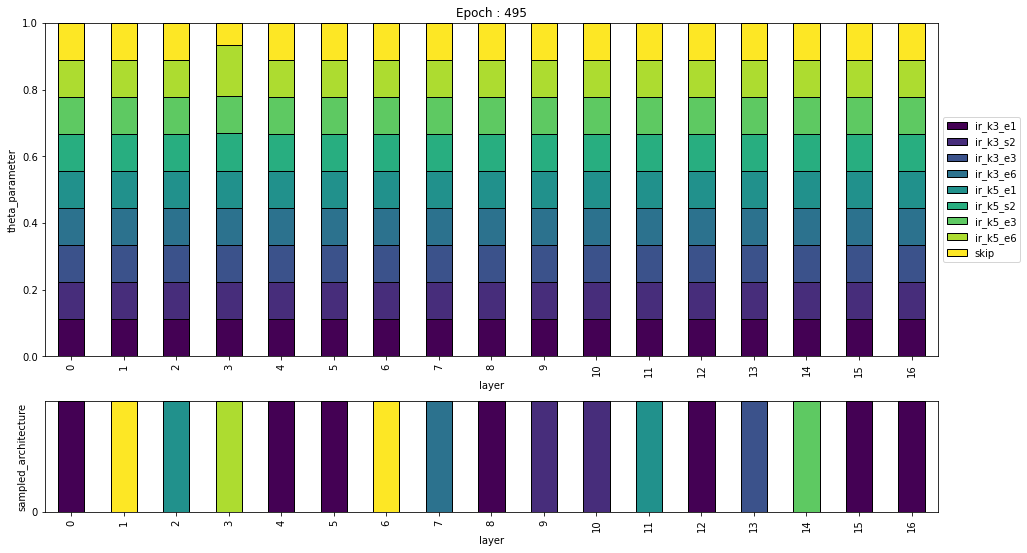

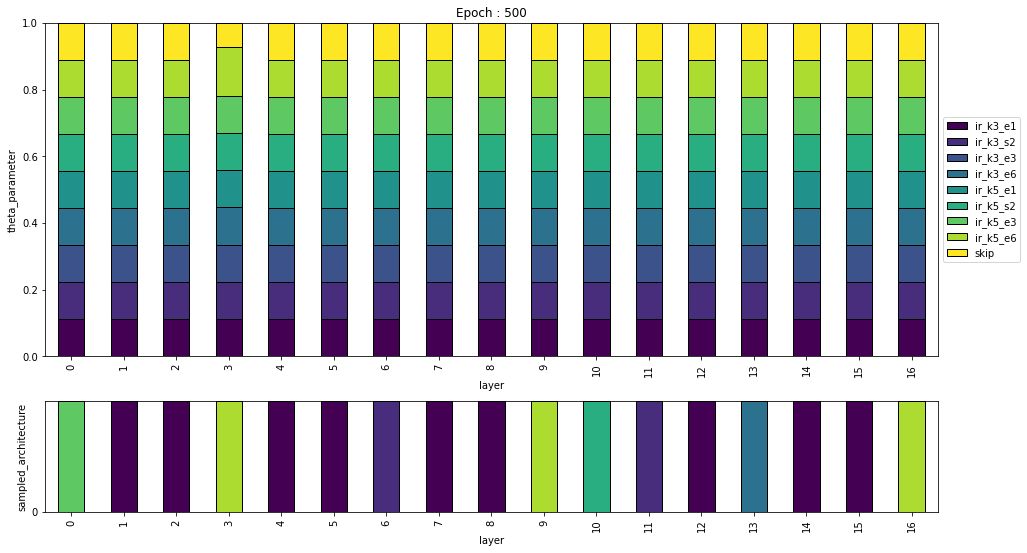

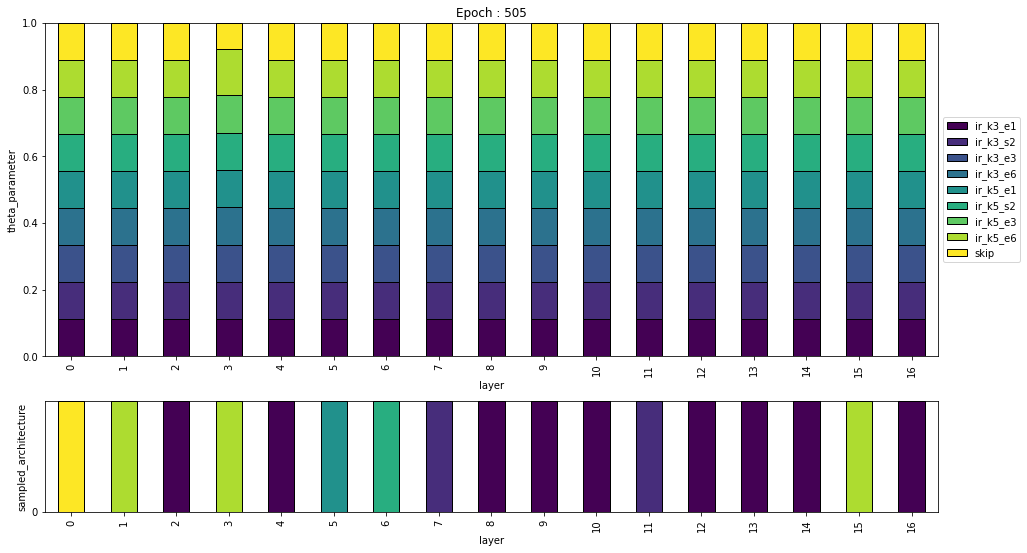

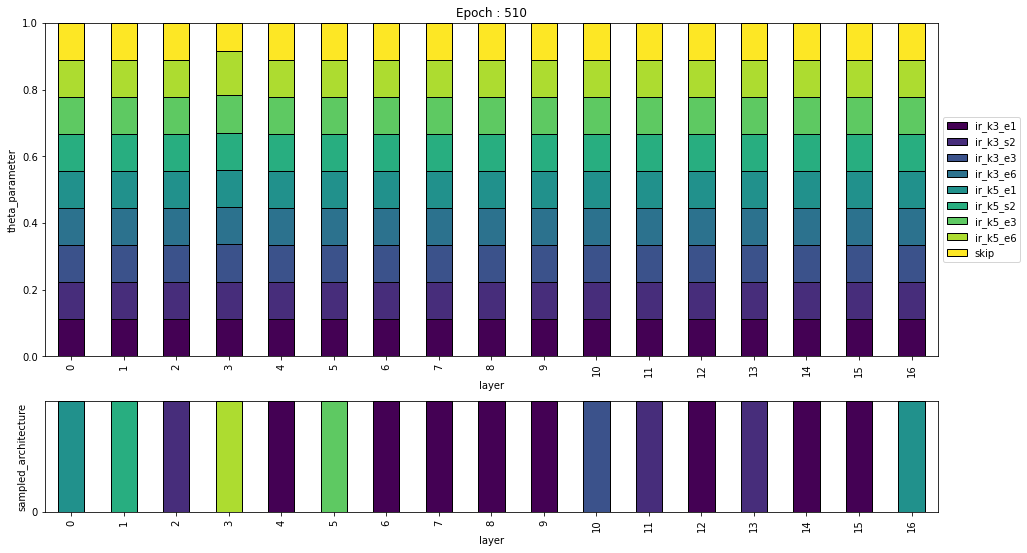

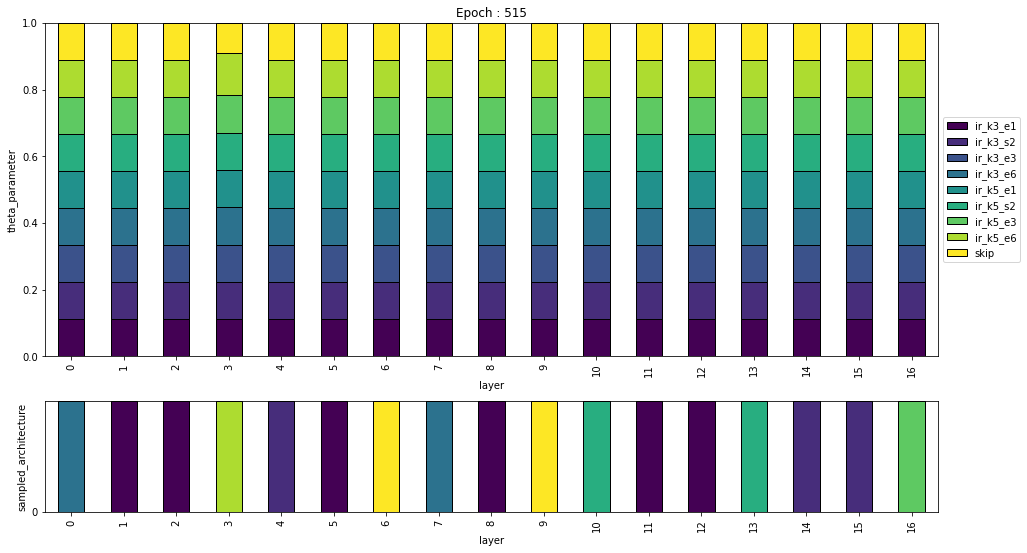

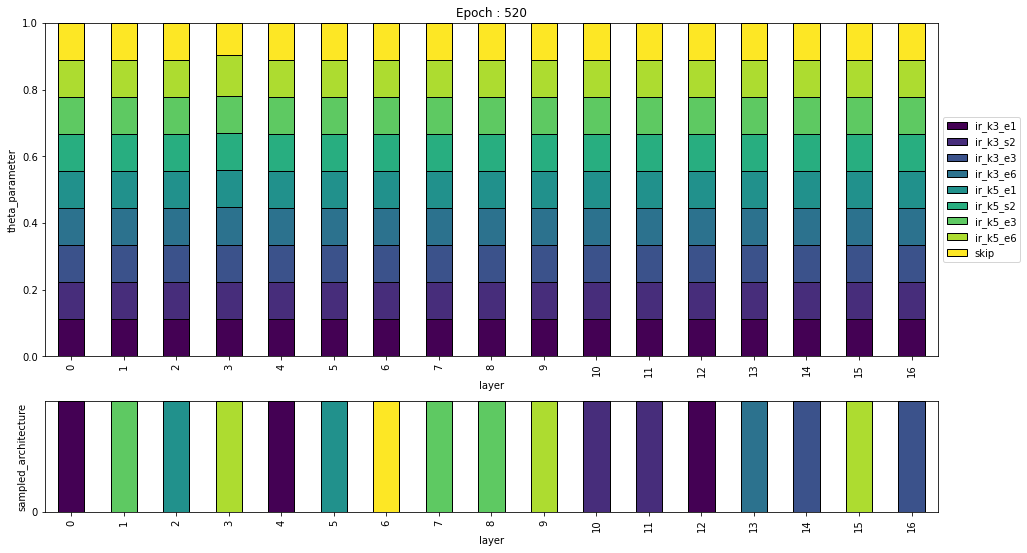

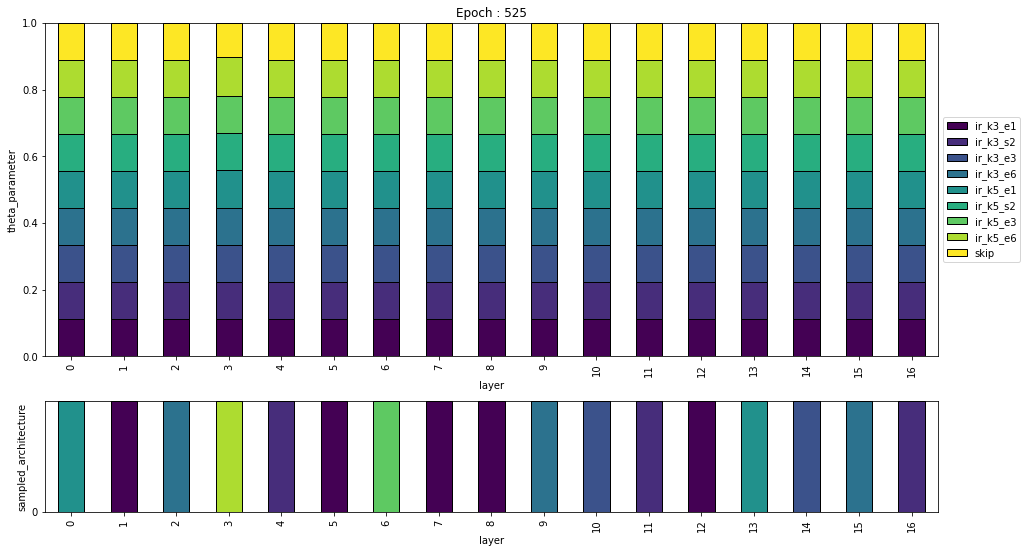

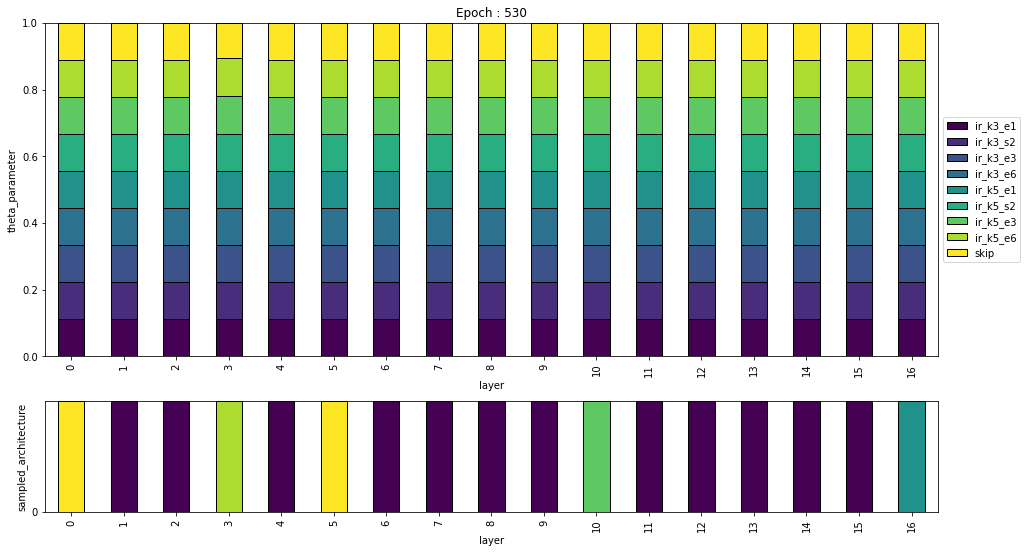

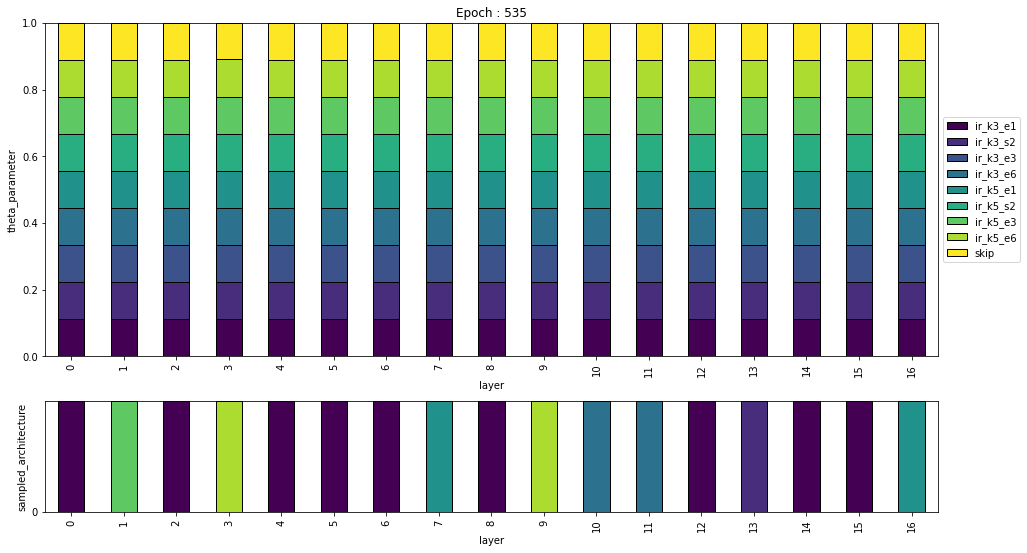

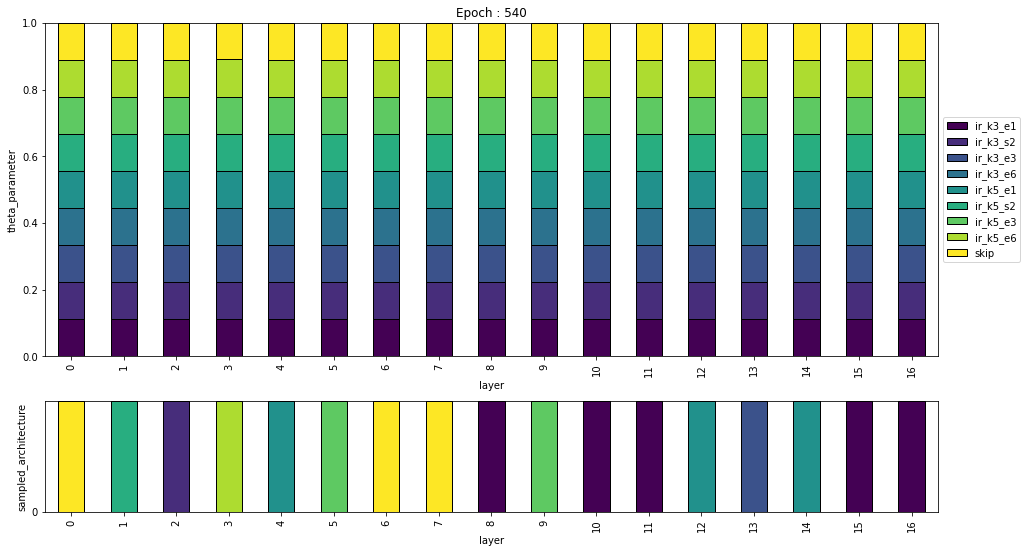

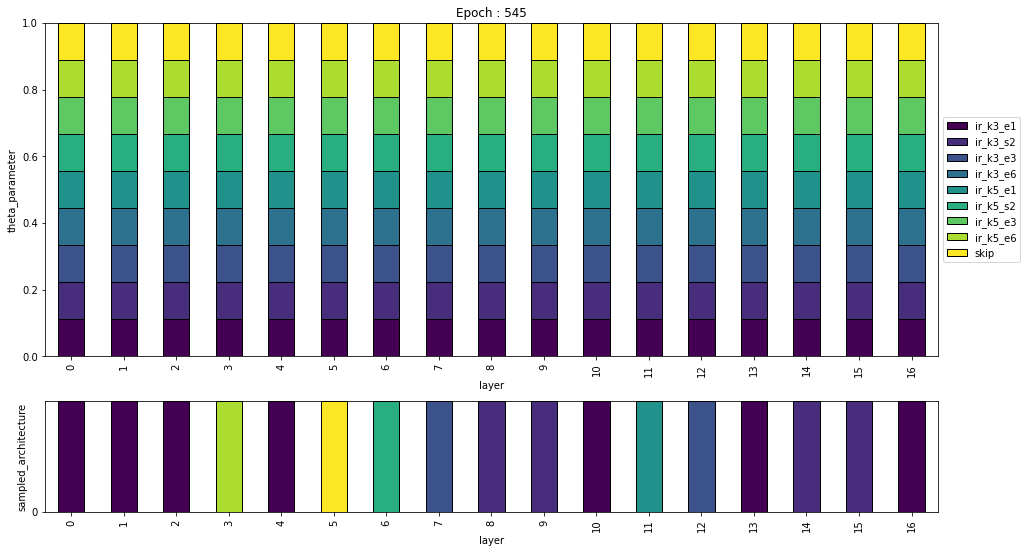

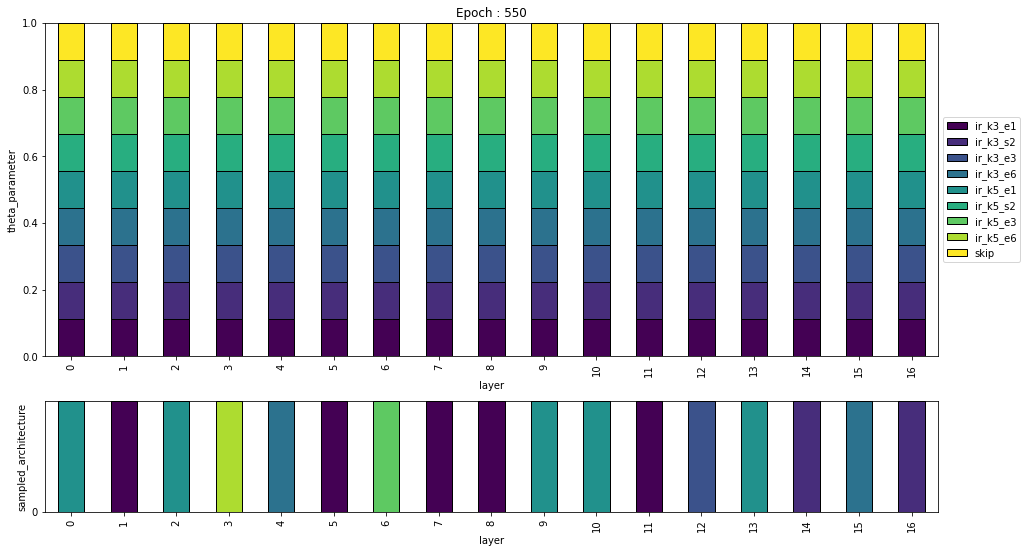

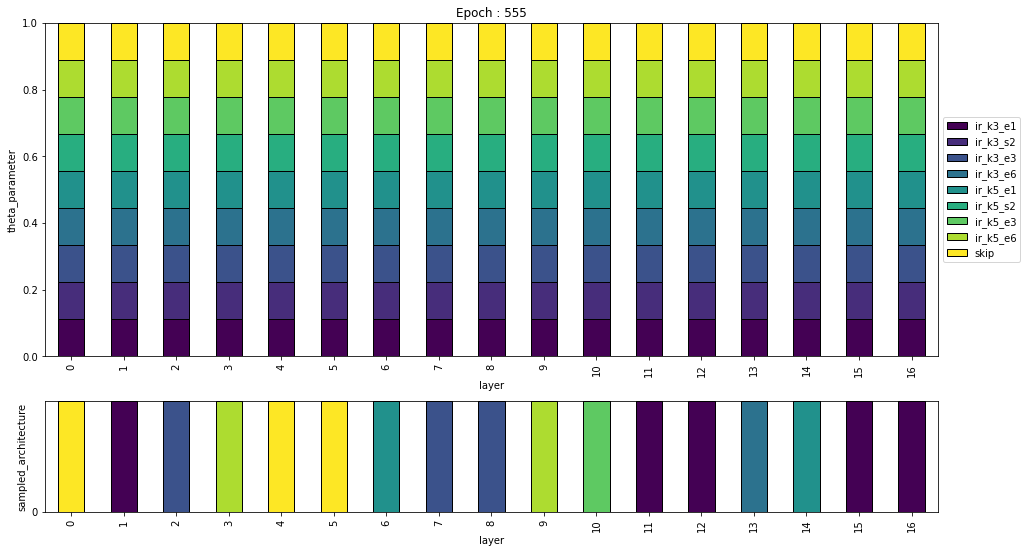

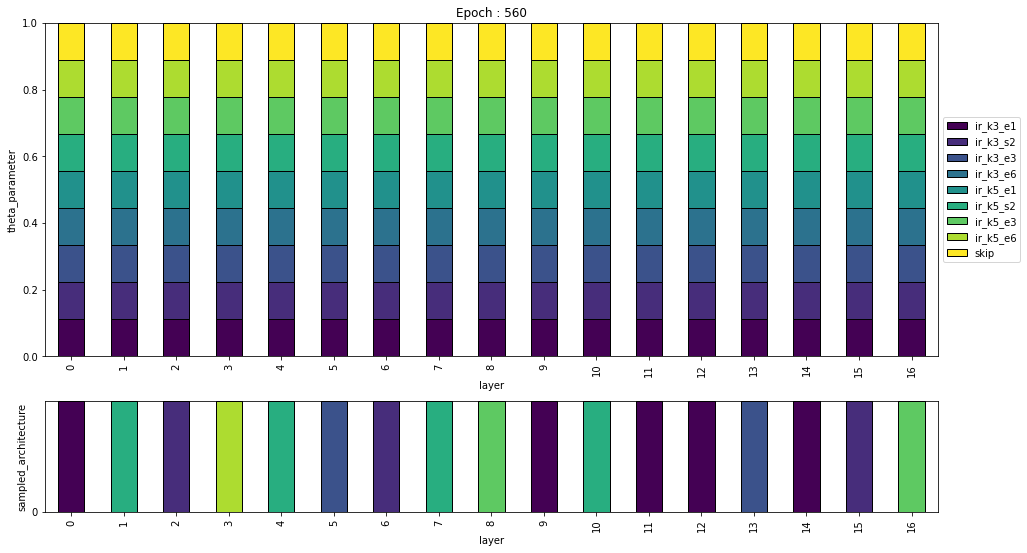

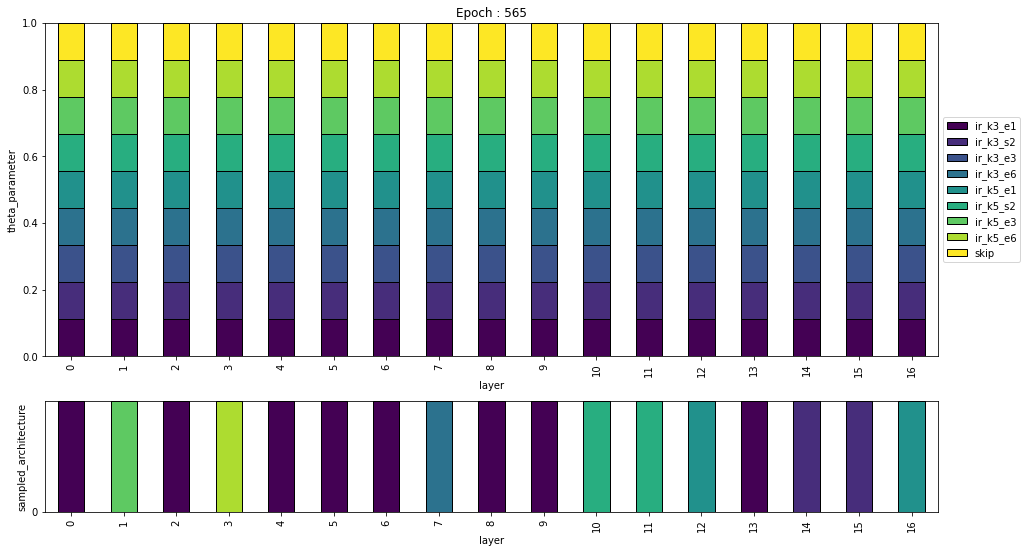

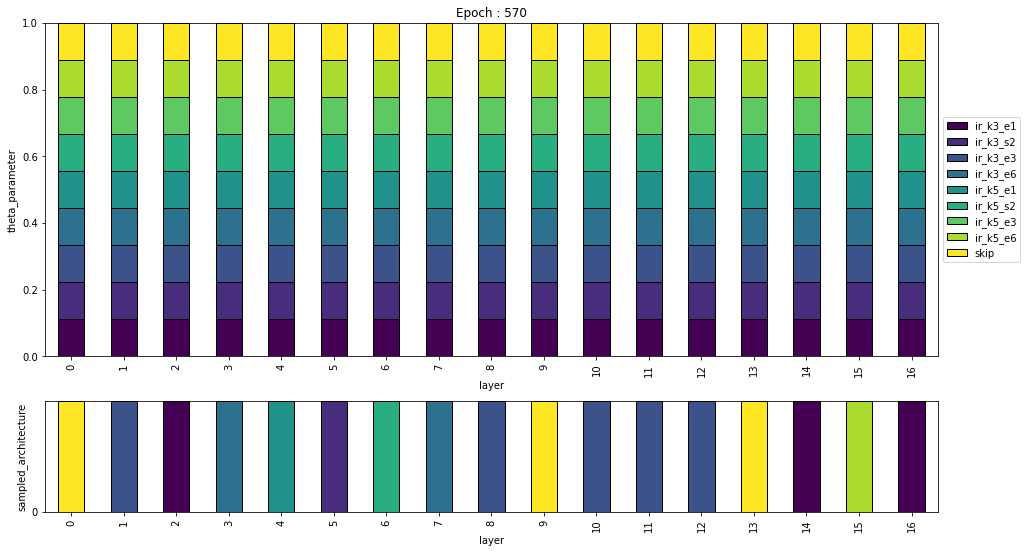

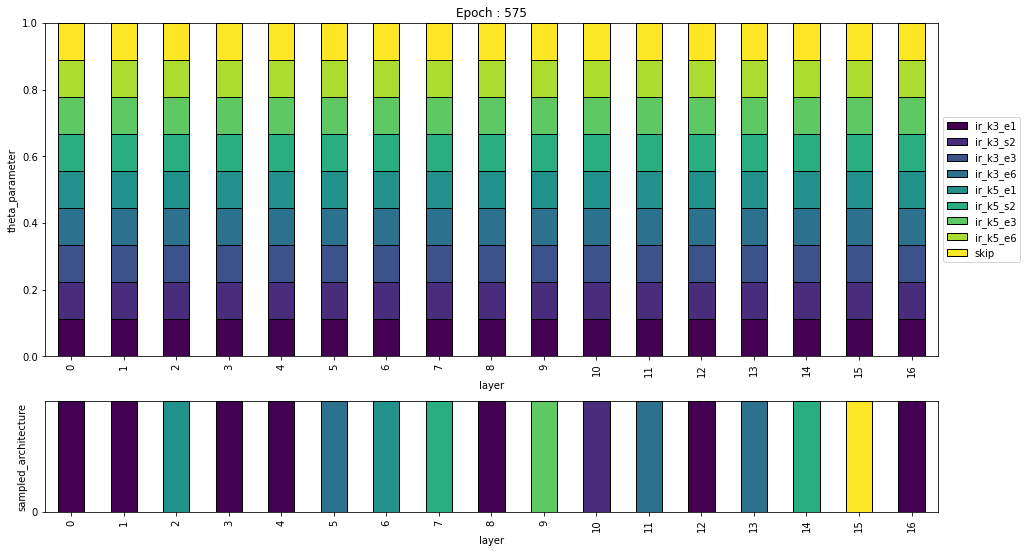

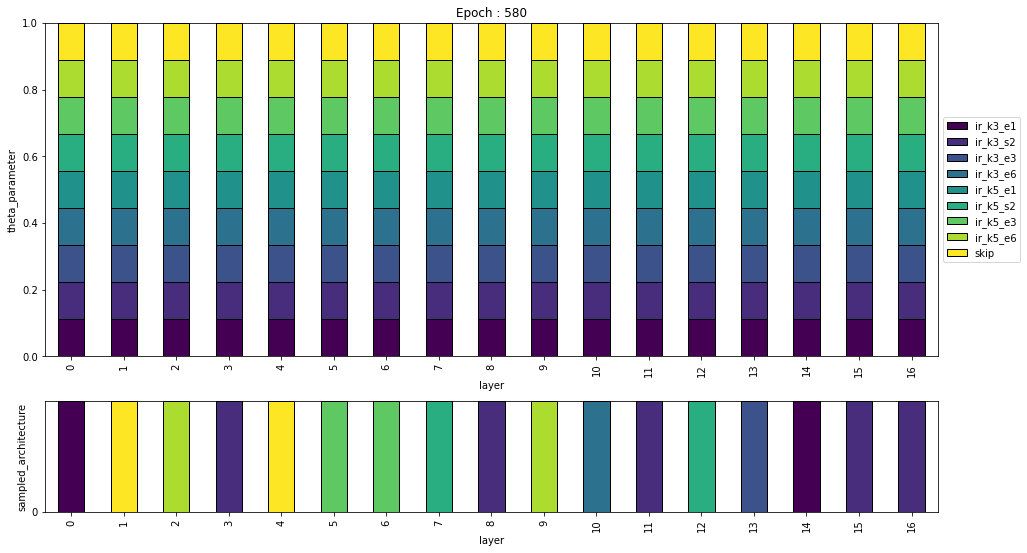

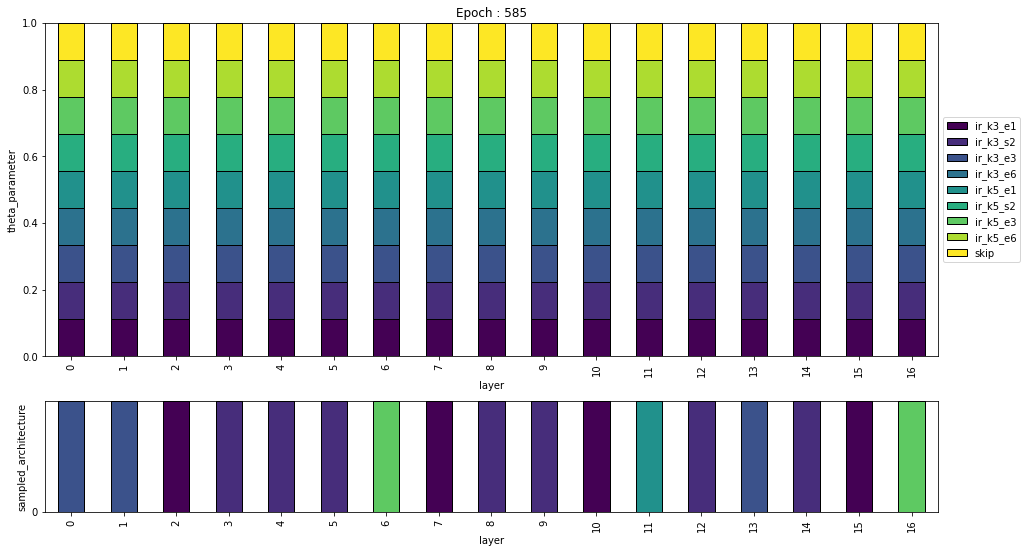

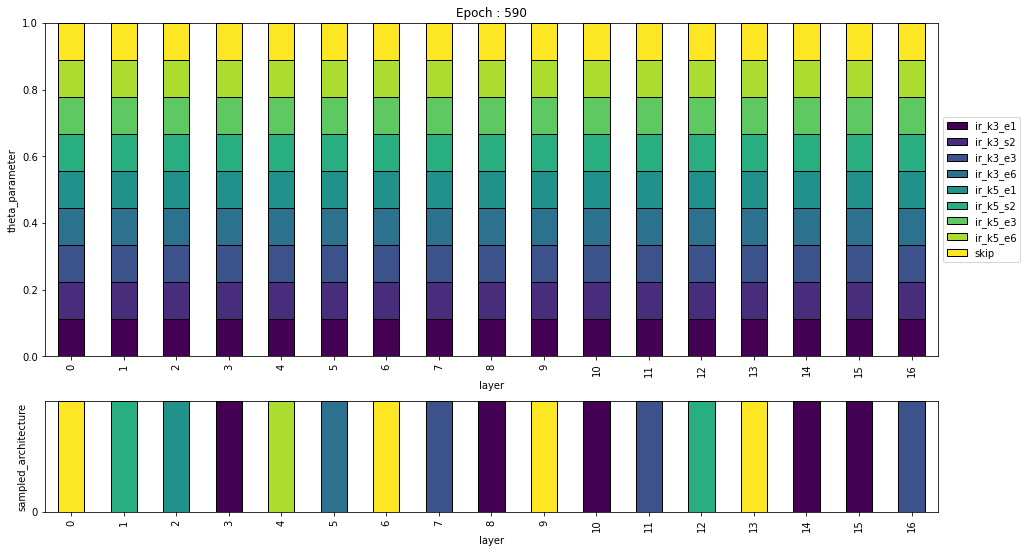

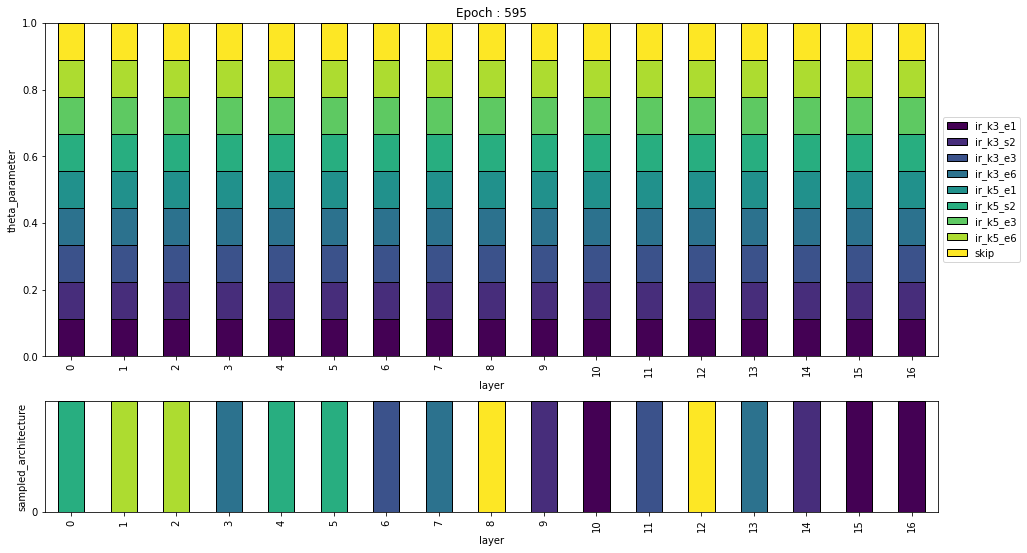

In [11]:

# %pylab inline

X_AXIS = [x for x in range(17)]
index = pd.Index(X_AXIS, name='layer')


# for custom layer color mapping
# colors = np.r_[np.linspace(0.1, 1, 9)] 
# mymap = plt.get_cmap("viridis")
# candidate_color = mymap(colors)

candidate_block = ['ir_k3_e1', 'ir_k3_s2','ir_k3_e3','ir_k3_e6','ir_k5_e1',
                   'ir_k5_s2', 'ir_k5_e3','ir_k5_e6','skip']




# for i in range(len(softmax_thetas_list)):
for i in np.arange(0,len(softmax_thetas_list),5):

    data = dict()

    argmax = np.argmax(softmax_thetas_list[i], axis=1)
    argmax_to_data = np.zeros((17,9))
    

    # softmax theta value
    for j in range(9):
        data[candidate_block[j]] =  np.array(softmax_thetas_list)[i,:,j]
        
    
    # sampled layer
    for k in range(17):   
        argmax_to_data[k,argmax[k]] = 1 

    # theta
    df = pd.DataFrame(data, index=index)
    
    # sampeled
    df2 = pd.DataFrame(argmax_to_data, index=index)

    
    
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18.5, 20))
    
    
    fig = plt.figure(figsize=(16,9))
    plt.axis('off')
    plt.title(f"Epoch : {i + 10}")
    spec = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[7.5, 2.5])
    
    ax1 = fig.add_subplot(spec[0])

    df.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', ax=ax1)
    ax1.set_ylim(0,1.0)
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.set_ylabel('theta_parameter')

    ax2 = fig.add_subplot(spec[1])
    
    df2.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', ax=ax2)
    ax2.set_ylim(0,1.0)
    ax2.set_yticks(range(0,1,1))
    ax2.get_legend().remove()
    # ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.set_ylabel('sampled_architecture')
    
    # fig = plt.gcf()
    # plt.axis('on')

    #plt.setp(ax1.get_xticklabels(), visible=False)
    #plt.setp(ax1.get_yticklabels(), visible=False)
    plt.savefig( join(prefix_image_path, f"stacked_{i}_epochs.png"))
    # plt.show()

In [35]:
a = torch.tensor([0,
 1,
 2,                                               
 3,                                                
 0,
 0,
 5,
 4.5,
 0])

(torch.nn.functional.gumbel_softmax(a, 0.1))

tensor([1.0692e-26, 4.8616e-26, 7.2990e-23, 4.4343e-17, 4.6186e-29, 1.6747e-20,
        6.8728e-05, 9.9993e-01, 1.7487e-29])

In [13]:
torch.nn.functional.softmax(torch.Tensor([-1,1,2]))

/Data2/home/kysim/anaconda3/envs/py37_tf1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.0351, 0.2595, 0.7054])

In [5]:
def get_gumbel_prob(xins, tau):
    gumbels = -torch.empty_like(xins).exponential_().log()
    logits = (xins.log_softmax(dim=-1) + gumbels) / tau
    probs = torch.nn.functional.softmax(logits, dim=-1)
    return(probs)

def get_gumbel_prob_GDAS(xins, tau):
    gumbels = -torch.empty_like(xins).exponential_().log()
    logits = (xins.log_softmax(dim=-1) + gumbels) / tau
    probs = torch.nn.functional.softmax(logits, dim=-1)
    
    index   = probs.max(-1, keepdim=True)[1]
    print(index)
    one_h   = torch.zeros_like(logits).scatter_(-1, index, 1.0)
    print(one_h)
    hardwts = one_h - probs.detach() + probs
    print(hardwts)
    return(hardwts)

In [42]:
a = torch.tensor([0,
 1,
 2,                                               
 3,                                                
 0,
 0,
 5,
 4.5,
 0])

In [50]:
torch.nn.functional.gumbel_softmax(a, 0.1)

tensor([2.4196e-26, 1.3686e-21, 9.8997e-15, 1.0438e-11, 1.4122e-17, 9.0270e-22,
        1.0000e+00, 6.6812e-10, 4.1454e-22])

In [51]:
get_gumbel_prob(a, 0.1)

tensor([3.7088e-34, 6.1612e-31, 4.7720e-17, 6.8054e-11, 2.1446e-20, 3.8118e-27,
        9.9992e-01, 7.7245e-05, 1.9431e-31])

In [45]:
get_gumbel_prob_GDAS(a, 0.1)

tensor([3])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 0., 0.])


tensor([0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [3]:
a = torch.tensor([0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11])

In [37]:
get_gumbel_prob(a, 0.00000000000000000000000000001)

tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [40]:
torch.nn.functional.gumbel_softmax(a, 0.0000000000000000000000000000000001)

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])